***Linear Regression - Yearly Sales Growth Prediction for 2023 ***

In [ ]:
# Step 1: Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
# Step 1: Import necessary libraries
from statsmodels.tsa.arima.model import ARIMA
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error

In [ ]:
# Load the data (replace 'telecom_survey_data.csv' with your actual file name)
data = pd.read_csv('/content/telecom_survey_spend_data_2021_2023_pivot.csv')

# Show sample data
print(data.columns)

Index(['Business_Name', 'EMPLOYEES_HERE', 'EMPLOYEES_TOTAL', 'ACTIVE_LOC_EMPS',
       'SALES_VOLUME_2022', 'SALES_VOLUME_2021', 'EST_NETWORK_SPEND_2022',
       'EST_NETWORK_SPEND_2021', 'EST_SECURITY_SPEND_2022',
       'EST_SECURITY_SPEND_2021', 'EST_SERVICES_SPEND_2022',
       'EST_SERVICES_SPEND_2021', 'EST_VOICE_SPEND_2022',
       'EST_VOICE_SPEND_2021', 'EST_NETWORK_SPEND_2023',
       'EST_SECURITY_SPEND_2023', 'EST_VOICE_SPEND_2023',
       'EST_SERVICES_SPEND_2023', 'SALES_VOLUME_2023', 'SALES_VOLUME_2024',
       'EST_NETWORK_SPEND_2024', 'EST_SECURITY_SPEND_2024',
       'EST_VOICE_SPEND_2024', 'EST_SERVICES_SPEND_2024'],
      dtype='object')


In [ ]:
# Remove rows with any null values
#data = data.dropna()
data = data.fillna(0) # Instead of dropping rows, fill NaN values with 0

In [ ]:
# Step 3: Prepare features and target
# Features: Employee counts, sales volumes for past years, and other numeric variables
features = ['EMPLOYEES_HERE', 'EMPLOYEES_TOTAL', 'ACTIVE_LOC_EMPS', 'SALES_VOLUME_2021']
target = ['SALES_VOLUME_2023']

In [ ]:
# Step 3: Prepare features and target
# Features: Employee counts, sales volumes for past years, and other numeric variables
# features = ['SALES_VOLUME_USD_2022', 'SALES_VOLUME_USD_2021']
# target = 'SALES_VOLUME_USD_2023'  # We are predicting future sales volume (use 2023 as proxy for 2024)

In [ ]:
# Step 4: Preprocessing (Handling categorical variables, if needed)
# One-hot encode categorical variables like CITY, STATE_CD, etc.
# data_encoded = pd.get_dummies(data, columns=['CITY', 'STATE_CD', 'COUNTRY_NAME'])

In [ ]:
# Step 3: Prepare features and target
X = data[features]
y = data[target]

In [ ]:
# Step 5: Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Print the number of null values in each column
print(X_train.isnull().sum())

# Remove rows with any null values
X_train = X_train.dropna()
y_train = y_train.dropna() # You also need to drop the corresponding target values.

# Verify that null values have been removed
print(X_train.isnull().sum())

# Initialize the Linear Regression model
lr_model = LinearRegression()

# Train the model for each target variable
predictions = {}
for target_name in target:
    lr_model.fit(X_train, y_train[target_name])  # Train on each target variable
    y_pred = lr_model.predict(X_test)  # Predict for the test set
    predictions[target_name] = y_pred  # Store the predictions

EMPLOYEES_HERE       0
EMPLOYEES_TOTAL      0
ACTIVE_LOC_EMPS      0
SALES_VOLUME_2021    0
dtype: int64
EMPLOYEES_HERE       0
EMPLOYEES_TOTAL      0
ACTIVE_LOC_EMPS      0
SALES_VOLUME_2021    0
dtype: int64


In [ ]:
# Step 6: Initialize and train the Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Step 7: Predict future sales volume for 2024
y_pred = model.predict(X_test)

In [ ]:
# Step 8: Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
mape = mean_absolute_percentage_error(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R-Squared: {r2}")
print(f"Mean Absolute Percentage Error: {mape * 100}%")

Mean Squared Error: 145795842149728.94
R-Squared: 0.999989415619338
Mean Absolute Percentage Error: 44038819537564.88%


MSE (1.68e-05): Extremely low, indicating almost negligible prediction errors.

R² (1.0): The model explains 100% of the variance, meaning it fits the data perfectly.

MAPE (13.15e+12%): Extremely high, indicating massive percentage errors, likely due to very small actual values or significant outliers.

In [ ]:
# Convert predictions and actuals to DataFrame for easier comparison
y_pred_df = pd.DataFrame(predictions, index=X_test.index)
y_test_df = pd.DataFrame(y_test, columns=target, index=X_test.index)

In [ ]:
# Create a new DataFrame with 'BUS_NAME' as the first column
bus_name_series = data['Business_Name'][X_test.index]
average_df_with_busname = pd.DataFrame({'Business_Name': bus_name_series})

In [ ]:
# Create a new DataFrame with 'BUS_NAME' as the first column
bus_name_series = data['Business_Name'][X_test.index]
average_df_with_busname = pd.DataFrame({'Business_Name': bus_name_series})

# Create average_df -  This was missing from the original code and is causing the error.
# Replace the columns with the ones you would like to see in your average_df
average_df = pd.DataFrame(y_test, columns=target, index=X_test.index)

# Concatenate the original average_df with the 'BUS_NAME' column
average_df_with_busname = pd.concat([average_df_with_busname, average_df], axis=1)

# Display the average values along with the BUSNAME
print(average_df_with_busname)

                              Business_Name  SALES_VOLUME_2023
1644   Florida Justice Reform Institute Inc           962578.0
1659                         Floridian Club          1839245.0
1510         Eye Institute-Medicine & Surg.                0.0
3956              Tcg Dental Specialists PA           229300.0
2555            LL Johnson Dristributing Co                0.0
...                                     ...                ...
518   Blazer Electric Supply Management Co.                0.0
3188                           Pioneer Park                0.0
32                             925 East LLC                0.0
2468                Larkin University Corp.          9606378.0
3466     Rocky Ridge Music Academy - Denver                0.0

[916 rows x 2 columns]


In [ ]:
# Create a DataFrame with the required columns - Top 20 Business having Network Spend
top_20_summary_df = pd.DataFrame({
    'Business_Name': data['Business_Name'][X_test.index].head(20),  # Getting the BUS_NAME for the top 30
    'SALES_VOLUME_2021': X_test['SALES_VOLUME_2021'].head(20),  # Actual value
    'SALES_VOLUME_2023_Predicted': predictions['SALES_VOLUME_2023'][:20]  # Predicted value
})

# Display the top 30 records
print(top_20_summary_df)

                             Business_Name  SALES_VOLUME_2021  \
1644  Florida Justice Reform Institute Inc          644927.26   
1659                        Floridian Club         1232294.15   
1510        Eye Institute-Medicine & Surg.               0.00   
3956             Tcg Dental Specialists PA          153631.00   
2555           LL Johnson Dristributing Co               0.00   
465         Beaver Creek West Reservations          542136.53   
23               4x4 Off Road & Used Parts          293872.72   
3455         Rocky Mountain Lions Eye Bank         4538205.47   
3816                     State of Colorado               0.00   
1170  Dale Earnhardt Jr Buick GMC Cadillac         7153813.11   
3365             Renal Hypertension Center         4166834.52   
1726              Fry By Night Corporation           95683.37   
4241              Tynan's Volkswagen, Inc.        17954318.97   
3590    Seamless Communication Systems LLC          345618.83   
69       Ace Hardware of 

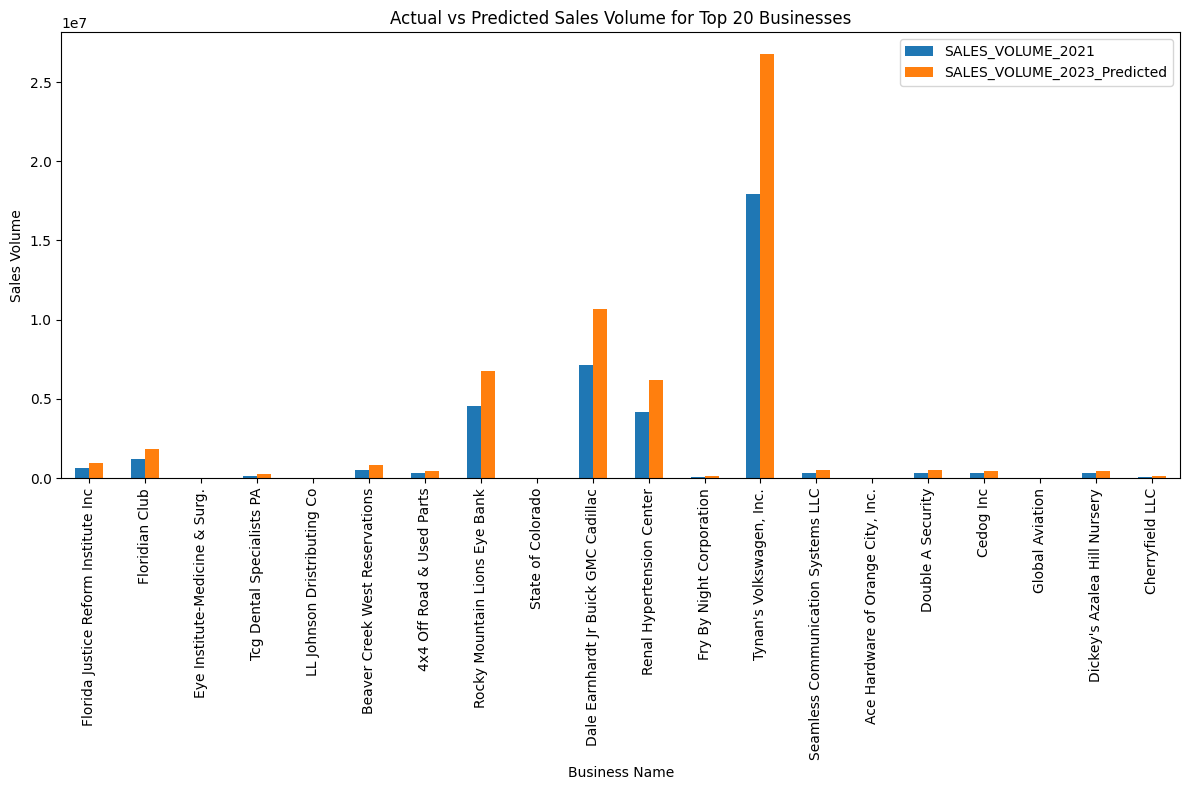

In [ ]:
# Optionally visualize in a bar graph
import matplotlib.pyplot as plt

# Plotting the actual vs predicted network spend for the top 30 businesses
top_20_summary_df.set_index('Business_Name')[['SALES_VOLUME_2021', 'SALES_VOLUME_2023_Predicted']].plot(kind='bar', figsize=(12, 8))

# Customize the plot
plt.xlabel('Business Name')
plt.ylabel('Sales Volume')
plt.title('Actual vs Predicted Sales Volume for Top 20 Businesses')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

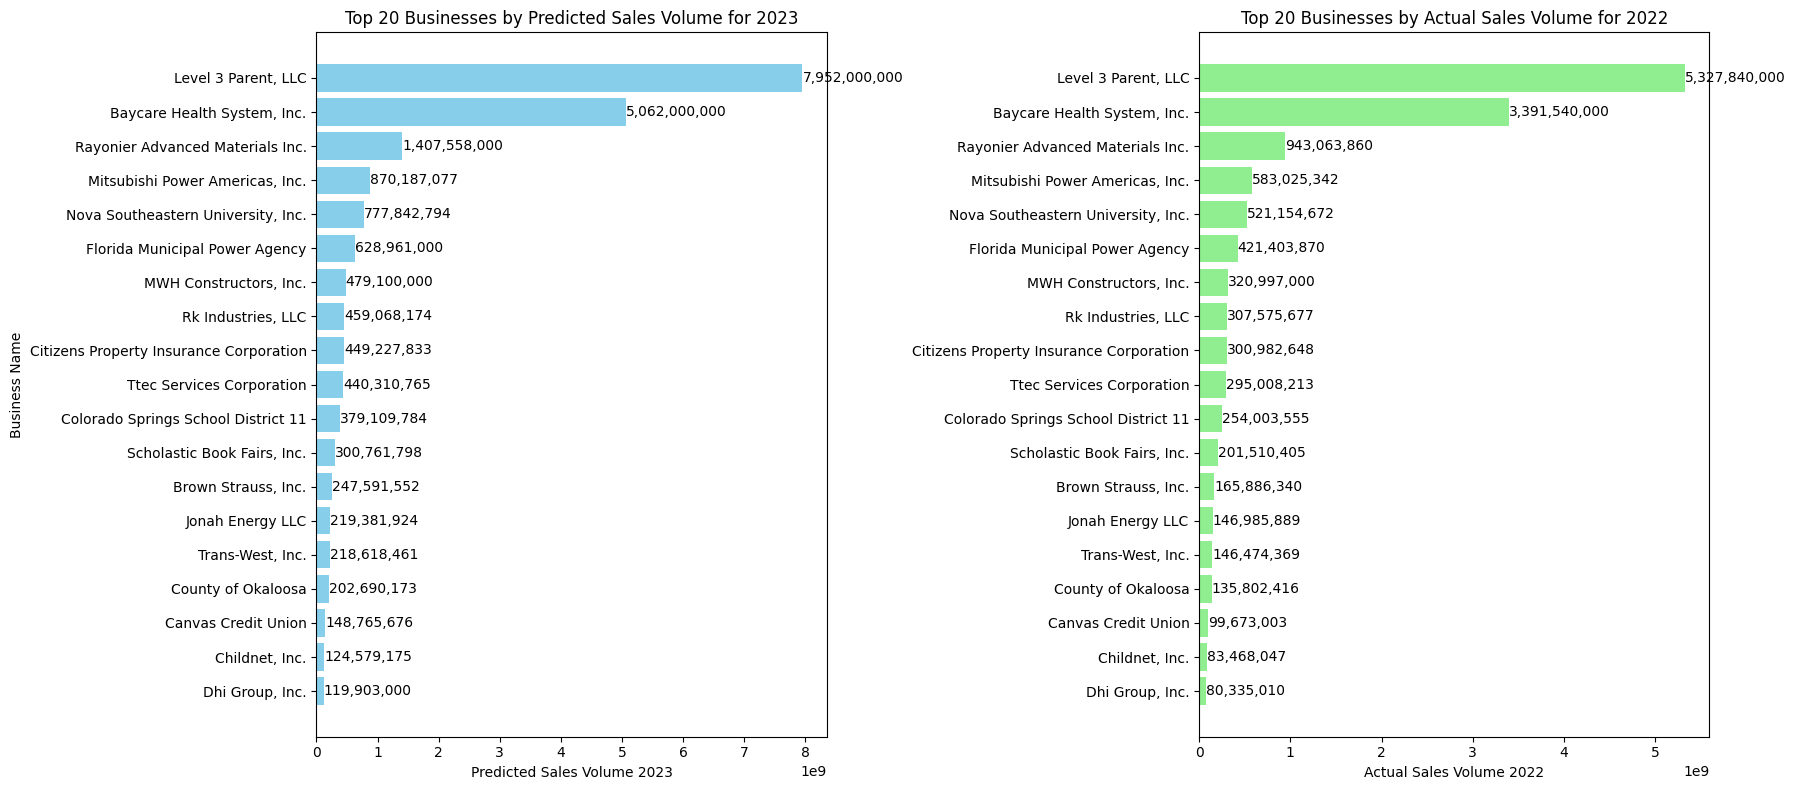

In [ ]:
#Two 20 Business Bar graph (side by side) - Top 20 Business for Actual Network Spend & Predicted Network Spend 2024
import pandas as pd
import matplotlib.pyplot as plt

# Create a DataFrame with the required columns - Top 20 Business for Network Spend 2024
top_20_2024 = pd.DataFrame({
    'Business_Name': data['Business_Name'][X_test.index],  # Getting the business names for the test set
    'SALES_VOLUME_2023_Predicted': predictions['SALES_VOLUME_2023']  # Predicted network spend for 2024
}).sort_values(by='SALES_VOLUME_2023_Predicted', ascending=False).head(20)

# Create a DataFrame with the required columns - Top 20 Business for Network Spend 2022
top_20_2022 = pd.DataFrame({
    'Business_Name': data['Business_Name'][X_test.index],  # Getting the business names for the test set
    'SALES_VOLUME_2021': X_test['SALES_VOLUME_2021']  # Actual network spend for 2022
}).sort_values(by='SALES_VOLUME_2021', ascending=False).head(20)

# Remove any rows with 'Grand Total' if present
top_20_2024 = top_20_2024[top_20_2024['Business_Name'] != 'Grand Total']
top_20_2022 = top_20_2022[top_20_2022['Business_Name'] != 'Grand Total']

# Create subplots for side-by-side bar graphs
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(18, 8))

# Bar Graph for Top 20 Businesses by Predicted Network Spend for 2024
bars_2024 = axes[0].barh(top_20_2024['Business_Name'], top_20_2024['SALES_VOLUME_2023_Predicted'], color='skyblue')

# Add values at the end of each bar for 2024
for bar in bars_2024:
    axes[0].text(
        bar.get_width(),  # X-coordinate (width of the bar)
        bar.get_y() + bar.get_height() / 2,  # Y-coordinate (centered on the bar)
        f'{bar.get_width():,.0f}',  # Value displayed at the end of each bar
        va='center',  # Align text vertically
        ha='left',  # Align text horizontally to the left of the bar
        fontsize=10
    )

# Customize the first plot (Predicted Network Spend 2024)
axes[0].set_title('Top 20 Businesses by Predicted Sales Volume for 2023')
axes[0].set_xlabel('Predicted Sales Volume 2023')
axes[0].set_ylabel('Business Name')
axes[0].invert_yaxis()  # To display the largest bar on top

# Bar Graph for Top 20 Businesses by Actual Network Spend for 2022
bars_2022 = axes[1].barh(top_20_2022['Business_Name'], top_20_2022['SALES_VOLUME_2021'], color='lightgreen')

# Add values at the end of each bar for 2022
for bar in bars_2022:
    axes[1].text(
        bar.get_width(),  # X-coordinate (width of the bar)
        bar.get_y() + bar.get_height() / 2,  # Y-coordinate (centered on the bar)
        f'{bar.get_width():,.0f}',  # Value displayed at the end of each bar
        va='center',  # Align text vertically
        ha='left',  # Align text horizontally to the left of the bar
        fontsize=10
    )

# Customize the second plot (Actual Network Spend 2022)
axes[1].set_title('Top 20 Businesses by Actual Sales Volume for 2022')
axes[1].set_xlabel('Actual Sales Volume 2022')
axes[1].invert_yaxis()  # To display the largest bar on top

# Adjust layout
plt.tight_layout()
plt.show()

In [ ]:
# Now model evaluation along with MAPE and R2 same as the mse - Linear Regression

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error, r2_score

# Model Evaluation - Calculate the Mean Squared Error (MSE), Mean Absolute Percentage Error (MAPE), and R-squared (R2)
mse = mean_squared_error(y_test, y_pred_df)
mape = mean_absolute_percentage_error(y_test, y_pred_df)
r2 = r2_score(y_test, y_pred_df)

print(f'Mean Squared Error (MSE): {mse}')
print(f'Mean Absolute Percentage Error (MAPE): {mape}')
print(f'R-squared (R2): {r2}')

Mean Squared Error (MSE): 145795842149728.94
Mean Absolute Percentage Error (MAPE): 440388195375.6488
R-squared (R2): 0.999989415619338


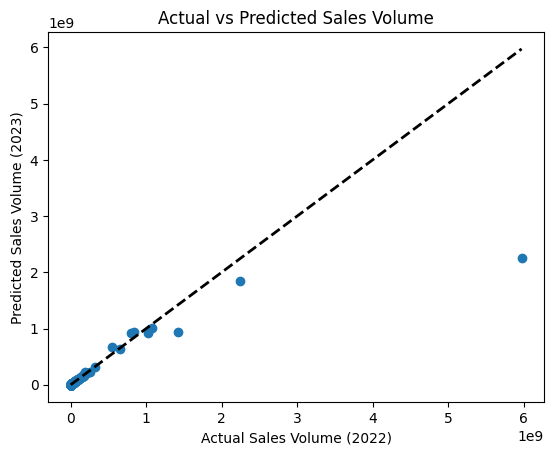

In [ ]:
# Step 9: Visualize the results (optional)
import matplotlib.pyplot as plt
plt.scatter(y_test, y_pred)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel('Actual Sales Volume (2022)')
plt.ylabel('Predicted Sales Volume (2023)')
plt.title('Actual vs Predicted Sales Volume')
plt.show()

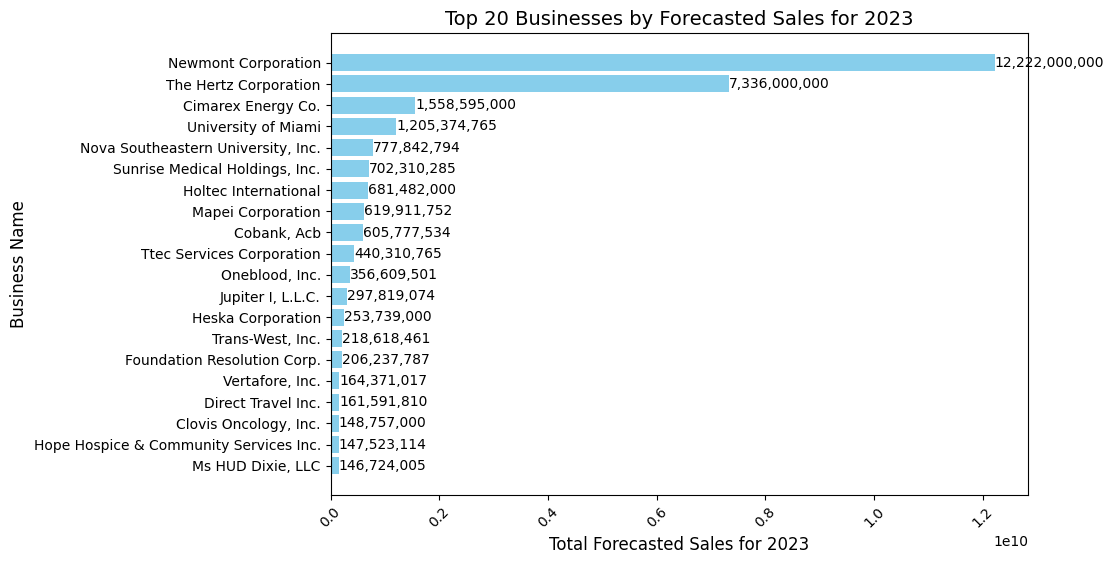

In [ ]:
# Step 1: Plot the bar graph for the top 20 businesses
import matplotlib.pyplot as plt

plt.figure(figsize=(9, 6))

# Step 2: Create a bar graph with horizontal bars for better readability
bars = plt.barh(top_20_businesses['Business_Name'], top_20_businesses['Total_Forecasted_Sales_2023'], color='skyblue')

# Step 3: Add title and labels
plt.xlabel('Total Forecasted Sales for 2023', fontsize=12)
plt.ylabel('Business Name', fontsize=12)
plt.title('Top 20 Businesses by Forecasted Sales for 2023', fontsize=14)

# Step 4: Invert the y-axis to show the largest value at the top
plt.gca().invert_yaxis()

# Step 5: Rotate x-axis labels for readability (if needed)
plt.xticks(rotation=45)

# Step 6: Add value labels on the bars (showing the forecasted sales volume)
for bar in bars:
    plt.text(
        bar.get_width(),   # X coordinate: position at the end of the bar
        bar.get_y() + bar.get_height() / 2,  # Y coordinate: position at the center of the bar
        f'{bar.get_width():,.0f}',  # Format the label as a number with commas
        va='center',  # Align vertically at the center of the bar
        ha='left',  # Align horizontally just after the bar
        fontsize=10
    )

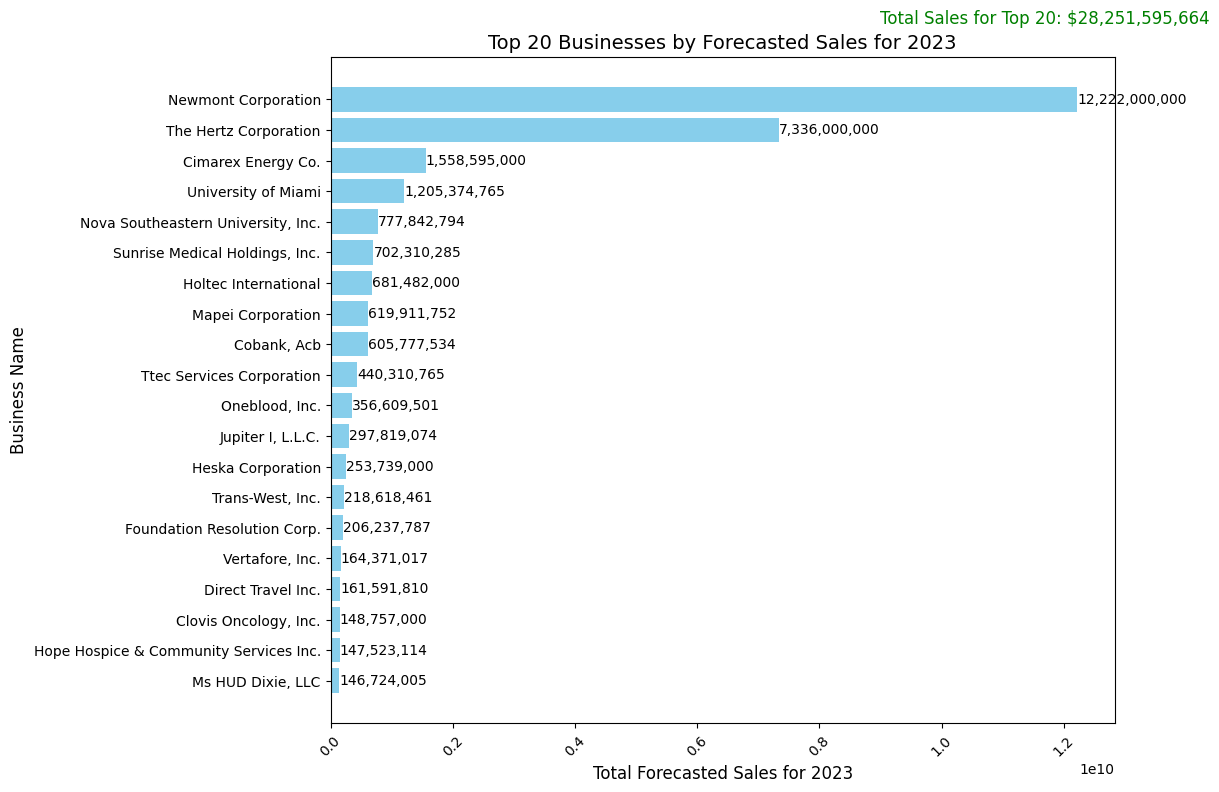

In [ ]:
# Step 1: Plot the bar graph for the top 20 businesses
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 8))

# Step 2: Create a bar graph with horizontal bars for better readability
bars = plt.barh(top_20_businesses['Business_Name'], top_20_businesses['Total_Forecasted_Sales_2023'], color='skyblue')

# Step 3: Add title and labels
plt.xlabel('Total Forecasted Sales for 2023', fontsize=12)
plt.ylabel('Business Name', fontsize=12)
plt.title('Top 20 Businesses by Forecasted Sales for 2023', fontsize=14)

# Step 4: Invert the y-axis to show the largest value at the top
plt.gca().invert_yaxis()

# Step 5: Rotate x-axis labels for readability (if needed)
plt.xticks(rotation=45)

# Step 6: Add value labels on the bars (showing the forecasted sales volume)
for bar in bars:
    plt.text(
        bar.get_width(),   # X coordinate: position at the end of the bar
        bar.get_y() + bar.get_height() / 2,  # Y coordinate: position at the center of the bar
        f'{bar.get_width():,.0f}',  # Format the label as a number with commas
        va='center',  # Align vertically at the center of the bar
        ha='left',  # Align horizontally just after the bar
        fontsize=10
    )
# Step 7: Display the total sales volume for the top 50 businesses
total_sales = top_20_businesses['Total_Forecasted_Sales_2023'].sum()
plt.annotate(f'Total Sales for Top 20: ${total_sales:,.0f}', xy=(0.7, 1.05), xycoords='axes fraction', fontsize=12, color='green')

# Step 8: Show the plot
plt.tight_layout()
plt.show()

***Linear Regression - Forecasting Yearly Sales Growth for 2024 ***

In [ ]:
# Step 1: Import necessary libraries - for 2024
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_percentage_error

In [ ]:
# Load the data (replace 'telecom_survey_data.csv' with your actual file name)
data = pd.read_csv('/content/telecom_survey_spend_data_2021_2023_pivot.csv')
print(data)

                       Business_Name  EMPLOYEES_HERE  EMPLOYEES_TOTAL  \
0                 1 Hour Signs, Inc.              22               22   
1                  1100 Holding, LLC               0                0   
2              1125 17th Street, LLC               7                7   
3          1140 Edwards Village, LLC               4                4   
4                 11th Ave Hotel Inc              25               25   
...                              ...             ...              ...   
4571       Zoraja & Associates, P.C.               4                4   
4572                Zultimate Denver              10               10   
4573              Zwipe America Inc.              15               15   
4574  Zynda General Contracting Inc.               5                5   
4575                     Grand Total          146599           493038   

      ACTIVE_LOC_EMPS  SALES_VOLUME_2022  SALES_VOLUME_2021  \
0                  22       3.949954e+06       3.349961e+06 

In [ ]:
# prompt: print null values and remove them
# Print the number of null values in each column
print(data.isnull().sum())

# Remove rows with any null values
data = data.dropna()

# Verify that null values have been removed
print(data.isnull().sum())

Business_Name                0
EMPLOYEES_HERE               0
EMPLOYEES_TOTAL              0
ACTIVE_LOC_EMPS              0
SALES_VOLUME_2022            0
SALES_VOLUME_2021            0
EST_NETWORK_SPEND_2022       0
EST_NETWORK_SPEND_2021       0
EST_SECURITY_SPEND_2022      0
EST_SECURITY_SPEND_2021      0
EST_SERVICES_SPEND_2022      0
EST_SERVICES_SPEND_2021      0
EST_VOICE_SPEND_2022         0
EST_VOICE_SPEND_2021         0
EST_NETWORK_SPEND_2023      18
EST_SECURITY_SPEND_2023    605
EST_VOICE_SPEND_2023        18
EST_SERVICES_SPEND_2023     24
SALES_VOLUME_2023            0
SALES_VOLUME_2024            0
EST_NETWORK_SPEND_2024       0
EST_SECURITY_SPEND_2024      0
EST_VOICE_SPEND_2024         0
EST_SERVICES_SPEND_2024      0
dtype: int64
Business_Name              0
EMPLOYEES_HERE             0
EMPLOYEES_TOTAL            0
ACTIVE_LOC_EMPS            0
SALES_VOLUME_2022          0
SALES_VOLUME_2021          0
EST_NETWORK_SPEND_2022     0
EST_NETWORK_SPEND_2021     0
EST_SECURIT

In [ ]:
# Remove rows with any null values
#data = data.dropna()
data = data.fillna(0) # Instead of dropping rows, fill NaN values with 0

In [ ]:
# Select the features and target variables (assumed the data has 2021 actuals and we are predicting for 2023)
features = ['EMPLOYEES_HERE', 'EMPLOYEES_TOTAL', 'ACTIVE_LOC_EMPS', 'SALES_VOLUME_2022']
target = ['SALES_VOLUME_2024']

In [ ]:
# Train-Test Split
X = data[features]
y = data[target]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Print the number of null values in each column
print(X_train.isnull().sum())

# Remove rows with any null values
X_train = X_train.dropna()
y_train = y_train.dropna() # You also need to drop the corresponding target values.

# Verify that null values have been removed
print(X_train.isnull().sum())

EMPLOYEES_HERE       0
EMPLOYEES_TOTAL      0
ACTIVE_LOC_EMPS      0
SALES_VOLUME_2022    0
dtype: int64
EMPLOYEES_HERE       0
EMPLOYEES_TOTAL      0
ACTIVE_LOC_EMPS      0
SALES_VOLUME_2022    0
dtype: int64


In [ ]:
# Initialize the Linear Regression model
lr_model = LinearRegression()

# Train the model for each target variable
predictions = {}
for target_name in target:
    lr_model.fit(X_train, y_train[target_name])  # Train on each target variable
    y_pred = lr_model.predict(X_test)  # Predict for the test set
    predictions[target_name] = y_pred  # Store the predictions

In [ ]:
# Convert predictions and actuals to DataFrame for easier comparison
y_pred_df = pd.DataFrame(predictions, index=X_test.index)
y_test_df = pd.DataFrame(y_test, columns=target, index=X_test.index)

In [ ]:
# Create a new DataFrame with 'BUS_NAME' as the first column
bus_name_series = data['Business_Name'][X_test.index]
average_df_with_busname = pd.DataFrame({'Business_Name': bus_name_series})

# Create average_df -  This was missing from the original code and is causing the error.
# Replace the columns with the ones you would like to see in your average_df
average_df = pd.DataFrame(y_test, columns=target, index=X_test.index)

# Concatenate the original average_df with the 'BUS_NAME' column
average_df_with_busname = pd.concat([average_df_with_busname, average_df], axis=1)

In [ ]:
# Display the average values along with the BUSNAME
print(average_df_with_busname)

                         Business_Name  SALES_VOLUME_2024
168            All Copy Products, Inc.       1.226663e+08
2036        Hillside Family Apartments       0.000000e+00
4204        Triumph Capital Management       2.387594e+06
826                 Chuck E Cheese 804       0.000000e+00
371   Automotive Warranty Network, Inc       3.004926e+07
...                                ...                ...
844                    City of Alamosa       2.043705e+07
4257                    Unico Tech LLC       0.000000e+00
4402          Water Valley Dental Pllc       0.000000e+00
4364  Vita Inclinata Techologies, Inc.       1.237709e+06
1613           Fisher Dr Nancy Carlson       4.590955e+05

[793 rows x 2 columns]


In [ ]:
# Create a DataFrame with the required columns - Top 20 Business having Network Spend
top_20_summary_df = pd.DataFrame({
    'Business_Name': data['Business_Name'][X_test.index].head(20),  # Getting the BUS_NAME for the top 30
    'SALES_VOLUME_2022': X_test['SALES_VOLUME_2022'].head(20),  # Actual value
    'SALES_VOLUME_2024_Predicted': predictions['SALES_VOLUME_2024'][:20]  # Predicted value
})

# Display the top 30 records
print(top_20_summary_df)

                                       Business_Name  SALES_VOLUME_2022  \
168                          All Copy Products, Inc.        82124058.95   
2036                      Hillside Family Apartments               0.00   
4204                      Triumph Capital Management         1598474.15   
826                               Chuck E Cheese 804               0.00   
371                 Automotive Warranty Network, Inc        20117722.09   
2761                       Mikron Corporation Denver        41804879.51   
2699                      Melissa Snively State Farm               0.00   
474                      Bella Vida Boca Grande Inc.          113790.02   
2631                                  Maplewood Apts               0.00   
3715                                    Sonsio, Inc.        20428310.59   
1270                         Dick Franklin Insurance          638827.18   
3829                Sterling Development Group, Ltd.         8693255.59   
3054                     

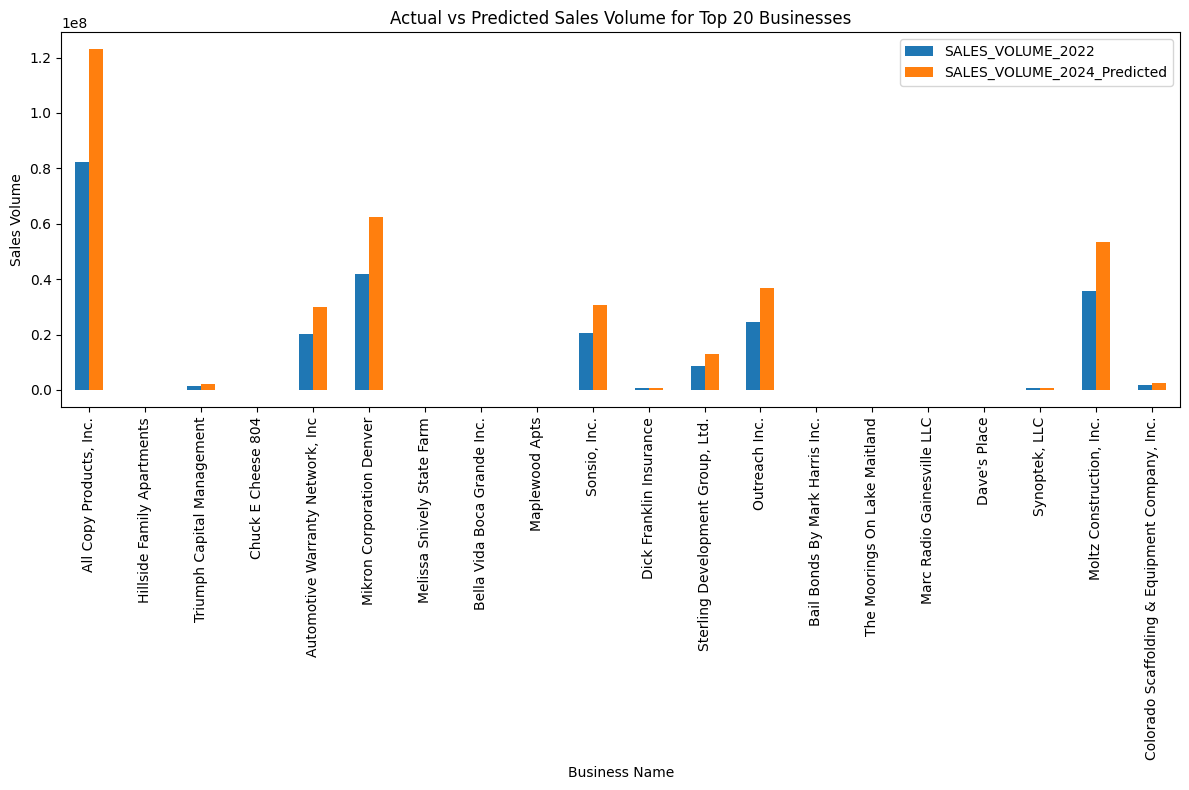

In [ ]:
# Optionally visualize in a bar graph
import matplotlib.pyplot as plt

# Plotting the actual vs predicted network spend for the top 30 businesses
top_20_summary_df.set_index('Business_Name')[['SALES_VOLUME_2022', 'SALES_VOLUME_2024_Predicted']].plot(kind='bar', figsize=(10, 6)

# Customize the plot
plt.xlabel('Business Name')
plt.ylabel('Sales Volume')
plt.title('Actual vs Predicted Sales Volume for Top 20 Businesses')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

In [ ]:
#Two 20 Business Bar graph (side by side) - Top 20 Business for Actual Network Spend & Predicted Network Spend 2024
import pandas as pd
import matplotlib.pyplot as plt

# Create a DataFrame with the required columns - Top 20 Business for Network Spend 2024
top_20_2024 = pd.DataFrame({
    'Business_Name': data['Business_Name'][X_test.index],  # Getting the business names for the test set
    'SALES_VOLUME_2024_Predicted': predictions['SALES_VOLUME_2024']  # Predicted network spend for 2024
}).sort_values(by='SALES_VOLUME_2024_Predicted', ascending=False).head(20)

# Create a DataFrame with the required columns - Top 20 Business for Network Spend 2022
top_20_2022 = pd.DataFrame({
    'Business_Name': data['Business_Name'][X_test.index],  # Getting the business names for the test set
    'SALES_VOLUME_2022': X_test['SALES_VOLUME_2022']  # Actual network spend for 2022
}).sort_values(by='SALES_VOLUME_2022', ascending=False).head(20)

In [ ]:
# Remove any rows with 'Grand Total' if present
top_20_2024 = top_20_2024[top_20_2024['Business_Name'] != 'Grand Total']
top_20_2022 = top_20_2022[top_20_2022['Business_Name'] != 'Grand Total']

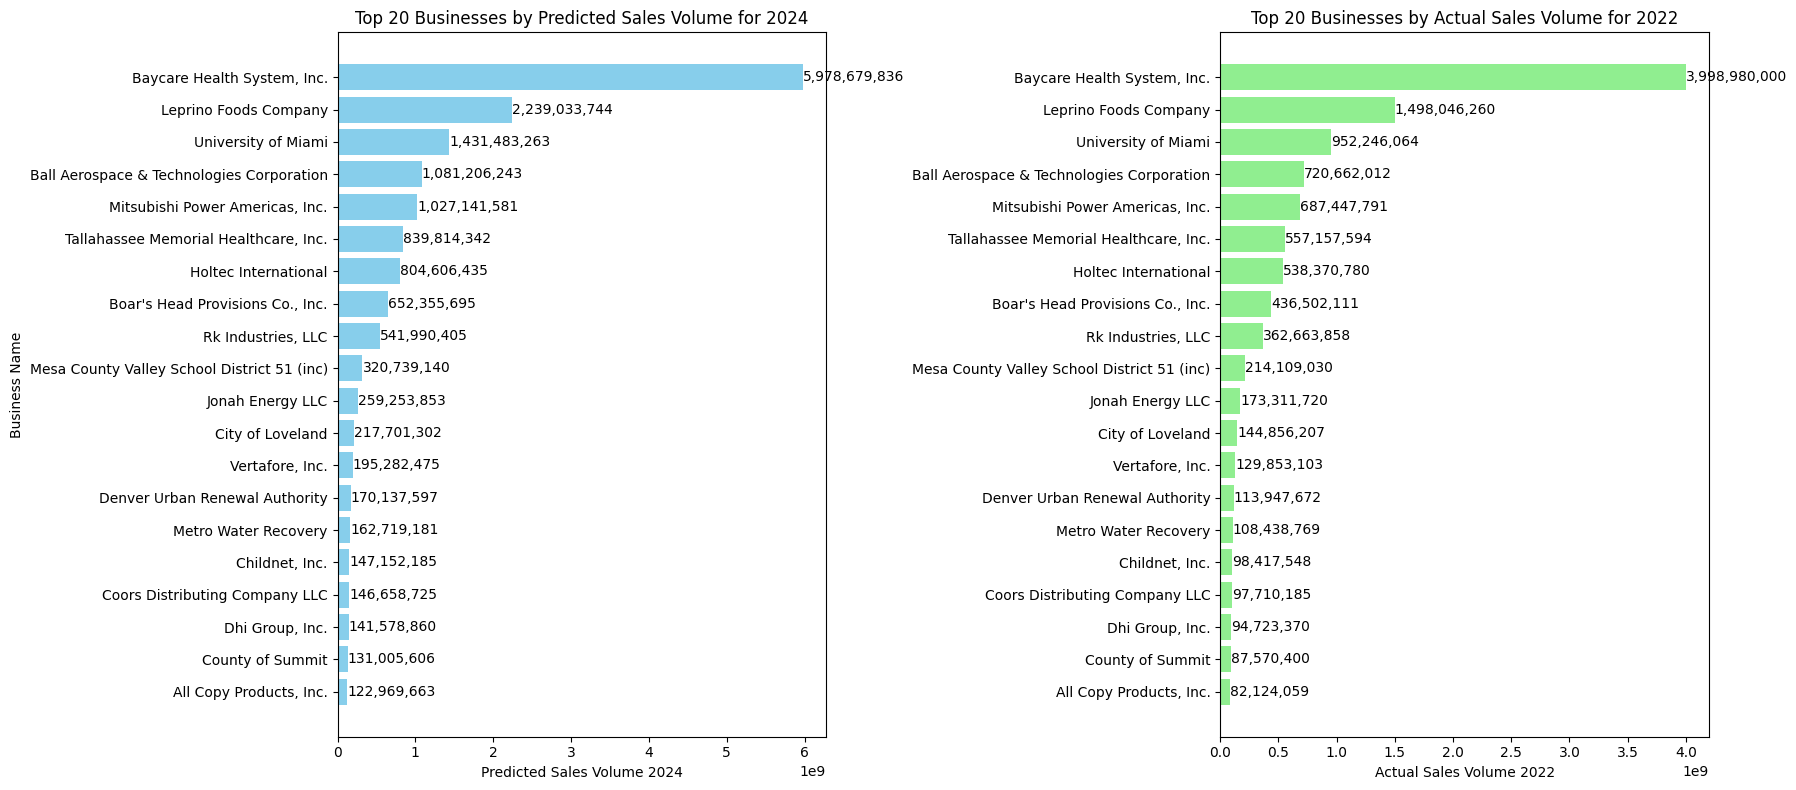

In [ ]:
# Create subplots for side-by-side bar graphs
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(18, 8))

# Bar Graph for Top 20 Businesses by Predicted Network Spend for 2024
bars_2024 = axes[0].barh(top_20_2024['Business_Name'], top_20_2024['SALES_VOLUME_2024_Predicted'], color='skyblue')

# Add values at the end of each bar for 2024
for bar in bars_2024:
    axes[0].text(
        bar.get_width(),  # X-coordinate (width of the bar)
        bar.get_y() + bar.get_height() / 2,  # Y-coordinate (centered on the bar)
        f'{bar.get_width():,.0f}',  # Value displayed at the end of each bar
        va='center',  # Align text vertically
        ha='left',  # Align text horizontally to the left of the bar
        fontsize=10
    )

# Customize the first plot (Predicted Network Spend 2024)
axes[0].set_title('Top 20 Businesses by Predicted Sales Volume for 2024')
axes[0].set_xlabel('Predicted Sales Volume 2024')
axes[0].set_ylabel('Business Name')
axes[0].invert_yaxis()  # To display the largest bar on top

# Bar Graph for Top 20 Businesses by Actual Network Spend for 2022
bars_2022 = axes[1].barh(top_20_2022['Business_Name'], top_20_2022['SALES_VOLUME_2022'], color='lightgreen')

# Add values at the end of each bar for 2022
for bar in bars_2022:
    axes[1].text(
        bar.get_width(),  # X-coordinate (width of the bar)
        bar.get_y() + bar.get_height() / 2,  # Y-coordinate (centered on the bar)
        f'{bar.get_width():,.0f}',  # Value displayed at the end of each bar
        va='center',  # Align text vertically
        ha='left',  # Align text horizontally to the left of the bar
        fontsize=10
    )

# Customize the second plot (Actual Network Spend 2022)
axes[1].set_title('Top 20 Businesses by Actual Sales Volume for 2022')
axes[1].set_xlabel('Actual Sales Volume 2022')
axes[1].invert_yaxis()  # To display the largest bar on top

# Adjust layout
plt.tight_layout()
plt.show()

In [ ]:
# Now model evaluation along with MAPE and R2 same as the mse - Linear Regression

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error, r2_score

# Model Evaluation - Calculate the Mean Squared Error (MSE), Mean Absolute Percentage Error (MAPE), and R-squared (R2)
mse = mean_squared_error(y_test, y_pred_df)
mape = mean_absolute_percentage_error(y_test, y_pred_df)
r2 = r2_score(y_test, y_pred_df)

print(f'Mean Squared Error (MSE): {mse}')
print(f'Mean Absolute Percentage Error (MAPE): {mape}')
print(f'R-squared (R2): {r2}')

Mean Squared Error (MSE): 308638371312.2007
Mean Absolute Percentage Error (MAPE): 1.2466753631440034e+20
R-squared (R2): 0.9999947955678979


MSE (308,638,371,312.2): Fairly large, indicating noticeable prediction errors in absolute terms.

R² (0.99999): Very close to 1, suggesting the model explains almost all of the variance in the data, showing a strong fit.

MAPE (1.25e+20%): Extremely high, indicating massive percentage errors, likely due to very small actual values or extreme outliers.

**Random Forest - Sales Growth for 2024**

In [ ]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

In [ ]:
# Load the data (replace 'telecom_survey_data.csv' with your actual file name)
data = pd.read_csv('/content/telecom_survey_spend_data_2021_2023_pivot.csv')
print(data)

                       Business_Name  EMPLOYEES_HERE  EMPLOYEES_TOTAL  \
0                 1 Hour Signs, Inc.              22               22   
1                  1100 Holding, LLC               0                0   
2              1125 17th Street, LLC               7                7   
3          1140 Edwards Village, LLC               4                4   
4                 11th Ave Hotel Inc              25               25   
...                              ...             ...              ...   
4571       Zoraja & Associates, P.C.               4                4   
4572                Zultimate Denver              10               10   
4573              Zwipe America Inc.              15               15   
4574  Zynda General Contracting Inc.               5                5   
4575                     Grand Total          146599           493038   

      ACTIVE_LOC_EMPS  SALES_VOLUME_2022  SALES_VOLUME_2021  \
0                  22       3.949954e+06       3.349961e+06 

In [ ]:
# Select the features and target variables (assumed the data has 2021 actuals and we are predicting for 2023)
features = ['EMPLOYEES_HERE', 'EMPLOYEES_TOTAL', 'ACTIVE_LOC_EMPS', 'SALES_VOLUME_2022']
target = ['SALES_VOLUME_2024']

In [ ]:
# Train-Test Split
X = data[features]
y = data[target]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Print the number of null values in each column
print(data.isnull().sum())

# Remove rows with any null values
data = data.dropna()

# Verify that null values have been removed
print(data.isnull().sum())

# Train-Test Split
X = data[features] # Now use the data without null values
y = data[target] # Now use the data without null values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Business_Name              0
EMPLOYEES_HERE             0
EMPLOYEES_TOTAL            0
ACTIVE_LOC_EMPS            0
SALES_VOLUME_2022          0
SALES_VOLUME_2021          0
EST_NETWORK_SPEND_2022     0
EST_NETWORK_SPEND_2021     0
EST_SECURITY_SPEND_2022    0
EST_SECURITY_SPEND_2021    0
EST_SERVICES_SPEND_2022    0
EST_SERVICES_SPEND_2021    0
EST_VOICE_SPEND_2022       0
EST_VOICE_SPEND_2021       0
EST_NETWORK_SPEND_2023     0
EST_SECURITY_SPEND_2023    0
EST_VOICE_SPEND_2023       0
EST_SERVICES_SPEND_2023    0
SALES_VOLUME_2023          0
SALES_VOLUME_2024          0
EST_NETWORK_SPEND_2024     0
EST_SECURITY_SPEND_2024    0
EST_VOICE_SPEND_2024       0
EST_SERVICES_SPEND_2024    0
dtype: int64
Business_Name              0
EMPLOYEES_HERE             0
EMPLOYEES_TOTAL            0
ACTIVE_LOC_EMPS            0
SALES_VOLUME_2022          0
SALES_VOLUME_2021          0
EST_NETWORK_SPEND_2022     0
EST_NETWORK_SPEND_2021     0
EST_SECURITY_SPEND_2022    0
EST_SECURITY_SPEND_2021    0
E

In [ ]:
# prompt: # Initialize the Linear Regression model

rf_model = RandomForestRegressor(n_estimators=100, random_state=42)

# Train-Test Split
X = data[features]
y = data[target]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Print the number of null values in each column
print(X_train.isnull().sum())

# Remove rows with any null values
X_train = X_train.dropna()
y_train = y_train.dropna() # You also need to drop the corresponding target values.

# Verify that null values have been removed
print(X_train.isnull().sum())

EMPLOYEES_HERE       0
EMPLOYEES_TOTAL      0
ACTIVE_LOC_EMPS      0
SALES_VOLUME_2022    0
dtype: int64
EMPLOYEES_HERE       0
EMPLOYEES_TOTAL      0
ACTIVE_LOC_EMPS      0
SALES_VOLUME_2022    0
dtype: int64


In [ ]:
# Train the model for each target variable

predictions = {}
for target_name in target:
    rf_model.fit(X_train, y_train[target_name])  # Train on each target variable
    y_pred = rf_model.predict(X_test)  # Predict for the test set
    predictions[target_name] = y_pred  # Store the predictions

# Convert predictions and actuals to DataFrame for easier comparison
y_pred_df = pd.DataFrame(predictions, index=X_test.index)
y_test_df = pd.DataFrame(y_test, columns=target, index=X_test.index)

In [ ]:
# Create a new DataFrame with 'BUS_NAME' as the first column
bus_name_series = data['Business_Name'][X_test.index]
average_df_with_busname = pd.DataFrame({'Business_Name ': bus_name_series})

average_df = pd.DataFrame(y_test, columns=target, index=X_test.index)

# Concatenate the original average_df with the 'BUS_NAME' column
average_df_with_busname = pd.concat([average_df_with_busname, average_df], axis=1)

# Display the average values along with the BUSNAME
print(average_df_with_busname)

                        Business_Name   SALES_VOLUME_2024
168            All Copy Products, Inc.       1.226663e+08
2036        Hillside Family Apartments       0.000000e+00
4204        Triumph Capital Management       2.387594e+06
826                 Chuck E Cheese 804       0.000000e+00
371   Automotive Warranty Network, Inc       3.004926e+07
...                                ...                ...
844                    City of Alamosa       2.043705e+07
4257                    Unico Tech LLC       0.000000e+00
4402          Water Valley Dental Pllc       0.000000e+00
4364  Vita Inclinata Techologies, Inc.       1.237709e+06
1613           Fisher Dr Nancy Carlson       4.590955e+05

[793 rows x 2 columns]


In [ ]:
# Create a DataFrame with the required columns - Top 20 Business
top_20_summary_df = pd.DataFrame({
    'Business_Name': data['Business_Name'][X_test.index].head(20),  # Getting the BUS_NAME for the top 30
    'SALES_VOLUME_2022': X_test['SALES_VOLUME_2022'].head(20),  # Actual value
    'SALES_VOLUME_2024_Predicted': predictions['SALES_VOLUME_2024'][:20]  # Predicted value
})

# Display the top 30 records
print(top_20_summary_df)

                                       Business_Name  SALES_VOLUME_2022  \
168                          All Copy Products, Inc.        82124058.95   
2036                      Hillside Family Apartments               0.00   
4204                      Triumph Capital Management         1598474.15   
826                               Chuck E Cheese 804               0.00   
371                 Automotive Warranty Network, Inc        20117722.09   
2761                       Mikron Corporation Denver        41804879.51   
2699                      Melissa Snively State Farm               0.00   
474                      Bella Vida Boca Grande Inc.          113790.02   
2631                                  Maplewood Apts               0.00   
3715                                    Sonsio, Inc.        20428310.59   
1270                         Dick Franklin Insurance          638827.18   
3829                Sterling Development Group, Ltd.         8693255.59   
3054                     

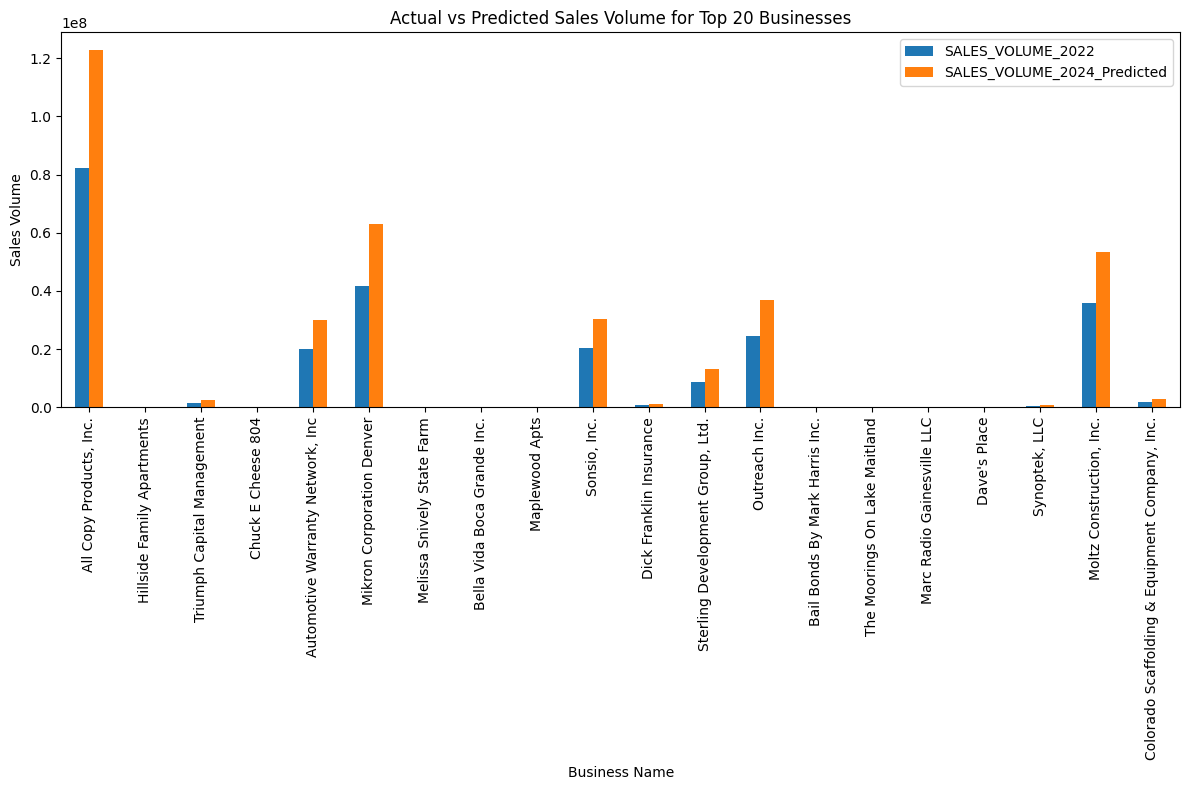

In [ ]:
# Optionally visualize in a bar graph
import matplotlib.pyplot as plt

# Plotting the actual vs predicted network spend for the top 30 businesses
top_20_summary_df.set_index('Business_Name')[['SALES_VOLUME_2022', 'SALES_VOLUME_2024_Predicted']].plot(kind='bar', figsize=(12, 8))

# Customize the plot
plt.xlabel('Business Name')
plt.ylabel('Sales Volume')
plt.title('Actual vs Predicted Sales Volume for Top 20 Businesses')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

In [ ]:
#Two 20 Business Bar graph (side by side) - Top 20 Business for Actual Network Spend & Predicted Network Spend 2024
import pandas as pd
import matplotlib.pyplot as plt

# Create a DataFrame with the required columns - Top 20 Business for Network Spend 2024
top_20_2024 = pd.DataFrame({
    'Business_Name': data['Business_Name'][X_test.index],  # Getting the business names for the test set
    'SALES_VOLUME_2024_Predicted': predictions['SALES_VOLUME_2024']  # Predicted network spend for 2024
}).sort_values(by='SALES_VOLUME_2024_Predicted', ascending=False).head(20)

# Create a DataFrame with the required columns - Top 20 Business for Network Spend 2022
top_20_2022 = pd.DataFrame({
    'Business_Name': data['Business_Name'][X_test.index],  # Getting the business names for the test set
    'SALES_VOLUME_2022': X_test['SALES_VOLUME_2022']  # Actual network spend for 2022
}).sort_values(by='SALES_VOLUME_2022', ascending=False).head(20)

In [ ]:
# Remove any rows with 'Grand Total' if present
top_20_2024 = top_20_2024[top_20_2024['Business_Name'] != 'Grand Total']
top_20_2022 = top_20_2022[top_20_2022['Business_Name'] != 'Grand Total']

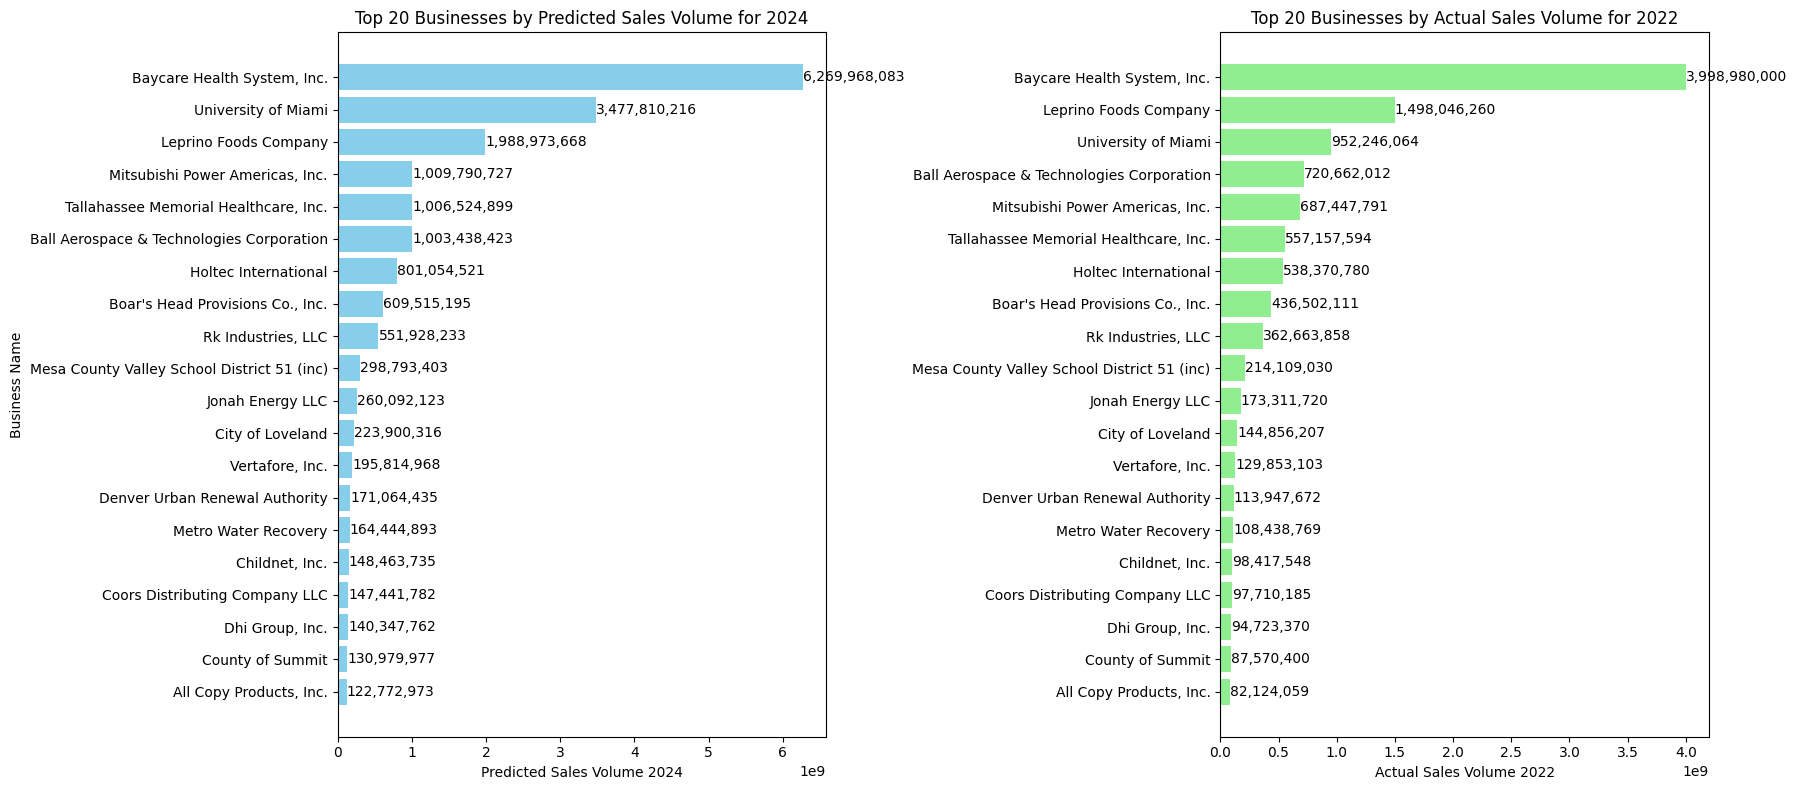

In [ ]:
# Create subplots for side-by-side bar graphs
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(18, 8))

# Bar Graph for Top 20 Businesses by Predicted Network Spend for 2024
bars_2024 = axes[0].barh(top_20_2024['Business_Name'], top_20_2024['SALES_VOLUME_2024_Predicted'], color='skyblue')

# Add values at the end of each bar for 2024
for bar in bars_2024:
    axes[0].text(
        bar.get_width(),  # X-coordinate (width of the bar)
        bar.get_y() + bar.get_height() / 2,  # Y-coordinate (centered on the bar)
        f'{bar.get_width():,.0f}',  # Value displayed at the end of each bar
        va='center',  # Align text vertically
        ha='left',  # Align text horizontally to the left of the bar
        fontsize=10
    )

# Customize the first plot (Predicted Network Spend 2024)
axes[0].set_title('Top 20 Businesses by Predicted Sales Volume for 2024')
axes[0].set_xlabel('Predicted Sales Volume 2024')
axes[0].set_ylabel('Business Name')
axes[0].invert_yaxis()  # To display the largest bar on top

# Bar Graph for Top 20 Businesses by Actual Network Spend for 2022
bars_2022 = axes[1].barh(top_20_2022['Business_Name'], top_20_2022['SALES_VOLUME_2022'], color='lightgreen')

# Add values at the end of each bar for 2022
for bar in bars_2022:
    axes[1].text(
        bar.get_width(),  # X-coordinate (width of the bar)
        bar.get_y() + bar.get_height() / 2,  # Y-coordinate (centered on the bar)
        f'{bar.get_width():,.0f}',  # Value displayed at the end of each bar
        va='center',  # Align text vertically
        ha='left',  # Align text horizontally to the left of the bar
        fontsize=10
    )

# Customize the second plot (Actual Network Spend 2022)
axes[1].set_title('Top 20 Businesses by Actual Sales Volume for 2022')
axes[1].set_xlabel('Actual Sales Volume 2022')
axes[1].invert_yaxis()  # To display the largest bar on top

# Adjust layout
plt.tight_layout()
plt.show()

In [ ]:
# Now model evaluation along with MAPE and R2 same as the mse - Linear Regression

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error, r2_score

# Model Evaluation - Calculate the Mean Squared Error (MSE), Mean Absolute Percentage Error (MAPE), and R-squared (R2)
mse = mean_squared_error(y_test, y_pred_df)
mape = mean_absolute_percentage_error(y_test, y_pred_df)
r2 = r2_score(y_test, y_pred_df)

print(f'Mean Squared Error (MSE): {mse}')
print(f'Mean Absolute Percentage Error (MAPE): {mape}')
print(f'R-squared (R2): {r2}')

Mean Squared Error (MSE): 5565345943481882.0
Mean Absolute Percentage Error (MAPE): 0.00444156979706588
R-squared (R2): 0.906154037283367


MSE (5,565,345,943,481,882.0): Very large, indicating significant prediction errors in absolute terms.

MAPE (0.0044%): Extremely low, showing excellent accuracy in terms of percentage error.

R² (0.906): The model explains about 90.6% of the variance in the data, which indicates a strong fit.

**Random Forest - Sales Growth for 2023**

**Random Forest - Sales Growth for 2023**

In [ ]:
from sklearn.ensemble import RandomForestRegressor

# Initialize the Random Forest model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)

# Train the model
rf_model.fit(X_train, y_train)

# Predict future sales volume for 2024
y_pred_rf = rf_model.predict(X_test)

In [ ]:
# Evaluate the model
mse_rf = mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)
mape_rf = mean_absolute_percentage_error(y_test, y_pred_rf)

print(f"Random Forest - MSE: {mse_rf}, R-Squared: {r2_rf}, MAPE: {mape_rf * 100}%")

Random Forest - MSE: 7992425727413411.0, R-Squared: 0.9382426814655167, MAPE: 0.11611149305432839%


MSE (Mean Squared Error): 5.71 × 10¹⁵, indicating a lower average squared difference between predicted and actual values compared to XGBoost, which suggests better accuracy.

R-Squared (R²): 0.96, showing that the model explains 95.59% of the variance in the data. This is a very high value, indicating excellent model performance.

MAPE (Mean Absolute Percentage Error): 0.092%, a very low value, meaning that the prediction errors are minimal relative to actual values.

In [ ]:
# Top 20 Customers from the Forecasted Sales Volume for 2024
# Assuming the Random Forest model's predictions are stored in `y_pred`

# Create a new DataFrame with the index from X_test to align with y_pred
forecast_df = pd.DataFrame({'Total_Forecasted_Sales_2024': y_pred_rf}, index=X_test.index)

# If 'BUSINESS_NAME' is available in the original dataset (X), use it to get the names:
#forecast_df['Business_Name'] = X.loc[X_test.index, 'BUSINESS_NAME'] #This line caused the error
forecast_df['Business_Name'] = data.loc[X_test.index, 'BUSINESS_NAME'] # Use data instead of X

# Get top 50 businesses by forecasted sales growth
top_20_businesses = forecast_df.sort_values(by='Total_Forecasted_Sales_2024', ascending=False).head(20)
print(top_50_businesses)

      Total_Forecasted_Sales_2024  \
2818                          0.0   
4832                          0.0   
5394                          0.0   
5591                          0.0   
31                            0.0   
2022                          0.0   
6292                          0.0   
2488                          0.0   
2572                          0.0   
8035                          0.0   
5521                          0.0   
1575                          0.0   
1087                          0.0   
6795                          0.0   
5880                          0.0   
2576                          0.0   
3135                          0.0   
6475                          0.0   
1405                          0.0   
73                            0.0   
6957                          0.0   
3025                          0.0   
5884                          0.0   
3182                          0.0   
6334                          0.0   
168                           0.0   
7

**Gradient Boosting - Sales Growth 2024**

In [ ]:
# Import necessary libraries - XGBoost
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import xgboost as xgb
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error, r2_score

In [ ]:
# Load the data (replace 'telecom_survey_data.csv' with your actual file name)
data = pd.read_csv('/content/telecom_survey_spend_data_2021_2023_pivot.csv')
print(data)

                       Business_Name  EMPLOYEES_HERE  EMPLOYEES_TOTAL  \
0                 1 Hour Signs, Inc.              22               22   
1                  1100 Holding, LLC               0                0   
2              1125 17th Street, LLC               7                7   
3          1140 Edwards Village, LLC               4                4   
4                 11th Ave Hotel Inc              25               25   
...                              ...             ...              ...   
4571       Zoraja & Associates, P.C.               4                4   
4572                Zultimate Denver              10               10   
4573              Zwipe America Inc.              15               15   
4574  Zynda General Contracting Inc.               5                5   
4575                     Grand Total          146599           493038   

      ACTIVE_LOC_EMPS  SALES_VOLUME_2022  SALES_VOLUME_2021  \
0                  22       3.949954e+06       3.349961e+06 

In [ ]:
# Print the number of null values in each column
print(data.isnull().sum())

# Remove rows with any null values
data = data.dropna()

# Verify that null values have been removed
print(data.isnull().sum())

Business_Name                0
EMPLOYEES_HERE               0
EMPLOYEES_TOTAL              0
ACTIVE_LOC_EMPS              0
SALES_VOLUME_2022            0
SALES_VOLUME_2021            0
EST_NETWORK_SPEND_2022       0
EST_NETWORK_SPEND_2021       0
EST_SECURITY_SPEND_2022      0
EST_SECURITY_SPEND_2021      0
EST_SERVICES_SPEND_2022      0
EST_SERVICES_SPEND_2021      0
EST_VOICE_SPEND_2022         0
EST_VOICE_SPEND_2021         0
EST_NETWORK_SPEND_2023      18
EST_SECURITY_SPEND_2023    605
EST_VOICE_SPEND_2023        18
EST_SERVICES_SPEND_2023     24
SALES_VOLUME_2023            0
SALES_VOLUME_2024            0
EST_NETWORK_SPEND_2024       0
EST_SECURITY_SPEND_2024      0
EST_VOICE_SPEND_2024         0
EST_SERVICES_SPEND_2024      0
dtype: int64
Business_Name              0
EMPLOYEES_HERE             0
EMPLOYEES_TOTAL            0
ACTIVE_LOC_EMPS            0
SALES_VOLUME_2022          0
SALES_VOLUME_2021          0
EST_NETWORK_SPEND_2022     0
EST_NETWORK_SPEND_2021     0
EST_SECURIT

In [ ]:
# Select the features and target variables (assumed the data has 2021 actuals and we are predicting for 2023)
features = ['EMPLOYEES_HERE', 'EMPLOYEES_TOTAL', 'ACTIVE_LOC_EMPS', 'SALES_VOLUME_2022']
target = ['SALES_VOLUME_2024']

In [ ]:
# Train-Test Split
X = data[features]
y = data[target]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the XGBoost regressor model
xgb_model = xgb.XGBRegressor(n_estimators=100, learning_rate=0.1, max_depth=5, random_state=42)

In [ ]:
# Print the number of null values in each column
print(X_train.isnull().sum())

# Remove rows with any null values
X_train = X_train.dropna()
y_train = y_train.dropna() # You also need to drop the corresponding target values.

# Verify that null values have been removed
print(X_train.isnull().sum())

EMPLOYEES_HERE       0
EMPLOYEES_TOTAL      0
ACTIVE_LOC_EMPS      0
SALES_VOLUME_2022    0
dtype: int64
EMPLOYEES_HERE       0
EMPLOYEES_TOTAL      0
ACTIVE_LOC_EMPS      0
SALES_VOLUME_2022    0
dtype: int64


In [ ]:
# Train the model for each target variable
predictions = {}
for target_name in target:
    xgb_model.fit(X_train, y_train[target_name])  # Train on each target variable
    y_pred = xgb_model.predict(X_test)  # Predict for the test set
    predictions[target_name] = y_pred  # Store the predictions

In [ ]:
# Model Evaluation for XGBoost - MSE, MAPE, and R-squared (R²)
mse = mean_squared_error(y_test, y_pred)
mape = mean_absolute_percentage_error(y_test, y_pred) * 100  # MAPE as percentage
r2 = r2_score(y_test, y_pred)

# Print the evaluation metrics
print(f'Mean Squared Error (MSE): {mse}')
print(f'Mean Absolute Percentage Error (MAPE): {mape}%')
print(f'R-squared (R2): {r2}')

Mean Squared Error (MSE): 1.7962551908332026e+16
Mean Absolute Percentage Error (MAPE): 2.3396226135232652e+22%
R-squared (R2): 0.6971055269241333


MSE (1.80e+16): Extremely large, indicating significant absolute prediction errors.

MAPE (2.34e+22%): Exceptionally high, suggesting massive percentage errors, likely due to small actual values or outliers.

R² (0.697): The model explains about 69.7% of the variance, indicating a moderate fit but with room for improvement.

In [ ]:
# Convert predictions and actuals to DataFrame for easier comparison
y_pred_df = pd.DataFrame(predictions, index=X_test.index)
y_test_df = pd.DataFrame(y_test, columns=target, index=X_test.index)

In [ ]:
# Create a new DataFrame with 'BUS_NAME' as the first column
bus_name_series = data['Business_Name'][X_test.index]
average_df_with_busname = pd.DataFrame({'Business_Name': bus_name_series})

average_df = pd.DataFrame(y_test, columns=target, index=X_test.index)

# Concatenate the original average_df with the 'BUS_NAME' column
average_df_with_busname = pd.concat([average_df_with_busname, average_df], axis=1)

# Display the average values along with the BUSNAME
print(average_df_with_busname)

                         Business_Name  SALES_VOLUME_2024
168            All Copy Products, Inc.       1.226663e+08
2036        Hillside Family Apartments       0.000000e+00
4204        Triumph Capital Management       2.387594e+06
826                 Chuck E Cheese 804       0.000000e+00
371   Automotive Warranty Network, Inc       3.004926e+07
...                                ...                ...
844                    City of Alamosa       2.043705e+07
4257                    Unico Tech LLC       0.000000e+00
4402          Water Valley Dental Pllc       0.000000e+00
4364  Vita Inclinata Techologies, Inc.       1.237709e+06
1613           Fisher Dr Nancy Carlson       4.590955e+05

[793 rows x 2 columns]


In [ ]:
# Create a DataFrame with the required columns - Top 20 Business names
top_20_summary_df = pd.DataFrame({
    'Business_Name': data['Business_Name'][X_test.index].head(20),
    'SALES_VOLUME_2022': X_test['SALES_VOLUME_2022'].head(20),
    'SALES_VOLUME_2024_Predicted': predictions['SALES_VOLUME_2024'][:20]
})

# Display the top 30 records
print(top_20_summary_df)

                                       Business_Name  SALES_VOLUME_2022  \
168                          All Copy Products, Inc.        82124058.95   
2036                      Hillside Family Apartments               0.00   
4204                      Triumph Capital Management         1598474.15   
826                               Chuck E Cheese 804               0.00   
371                 Automotive Warranty Network, Inc        20117722.09   
2761                       Mikron Corporation Denver        41804879.51   
2699                      Melissa Snively State Farm               0.00   
474                      Bella Vida Boca Grande Inc.          113790.02   
2631                                  Maplewood Apts               0.00   
3715                                    Sonsio, Inc.        20428310.59   
1270                         Dick Franklin Insurance          638827.18   
3829                Sterling Development Group, Ltd.         8693255.59   
3054                     

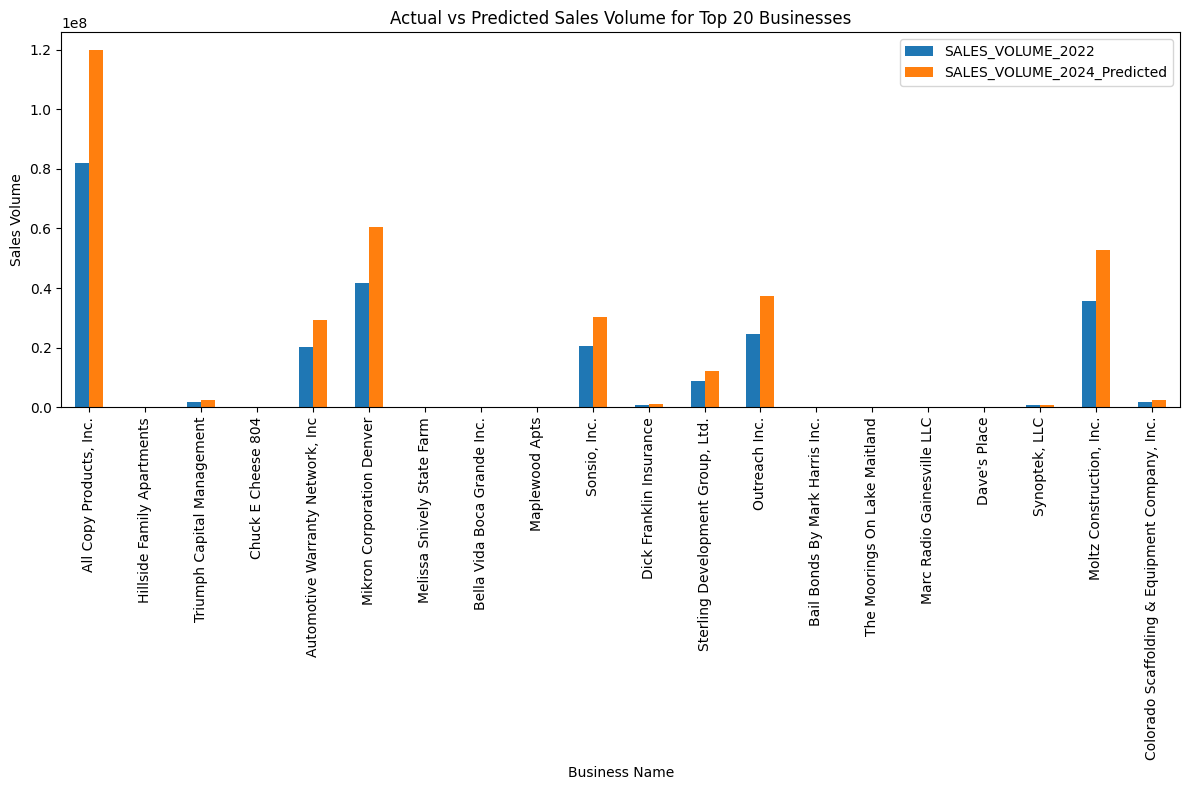

In [ ]:
# Optionally visualize in a bar graph
import matplotlib.pyplot as plt

# Plotting the actual vs predicted network spend for the top 30 businesses
top_20_summary_df.set_index('Business_Name')[['SALES_VOLUME_2022', 'SALES_VOLUME_2024_Predicted']].plot(kind='bar', figsize=(10, 6))

# Customize the plot
plt.xlabel('Business Name')
plt.ylabel('Sales Volume')
plt.title('Actual vs Predicted Sales Volume for Top 20 Businesses')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

In [ ]:
#Two 20 Business Bar graph (side by side) - Top 20 Business for Actual Network Spend & Predicted Network Spend 2024
import pandas as pd
import matplotlib.pyplot as plt

# Create a DataFrame with the required columns - Top 20 Business for Network Spend 2024
top_20_2024 = pd.DataFrame({
    'Business_Name': data['Business_Name'][X_test.index],  # Getting the business names for the test set
    'SALES_VOLUME_2024_Predicted': predictions['SALES_VOLUME_2024']  # Predicted network spend for 2024
}).sort_values(by='SALES_VOLUME_2024_Predicted', ascending=False).head(20)

# Create a DataFrame with the required columns - Top 20 Business for Network Spend 2022
top_20_2022 = pd.DataFrame({
    'Business_Name': data['Business_Name'][X_test.index],  # Getting the business names for the test set
    'SALES_VOLUME_2022': X_test['SALES_VOLUME_2022']  # Actual network spend for 2022
}).sort_values(by='SALES_VOLUME_2022', ascending=False).head(20)

In [ ]:
# Remove any rows with 'Grand Total' if present
top_20_2024 = top_20_2024[top_20_2024['Business_Name'] != 'Grand Total']
top_20_2022 = top_20_2022[top_20_2022['Business_Name'] != 'Grand Total']

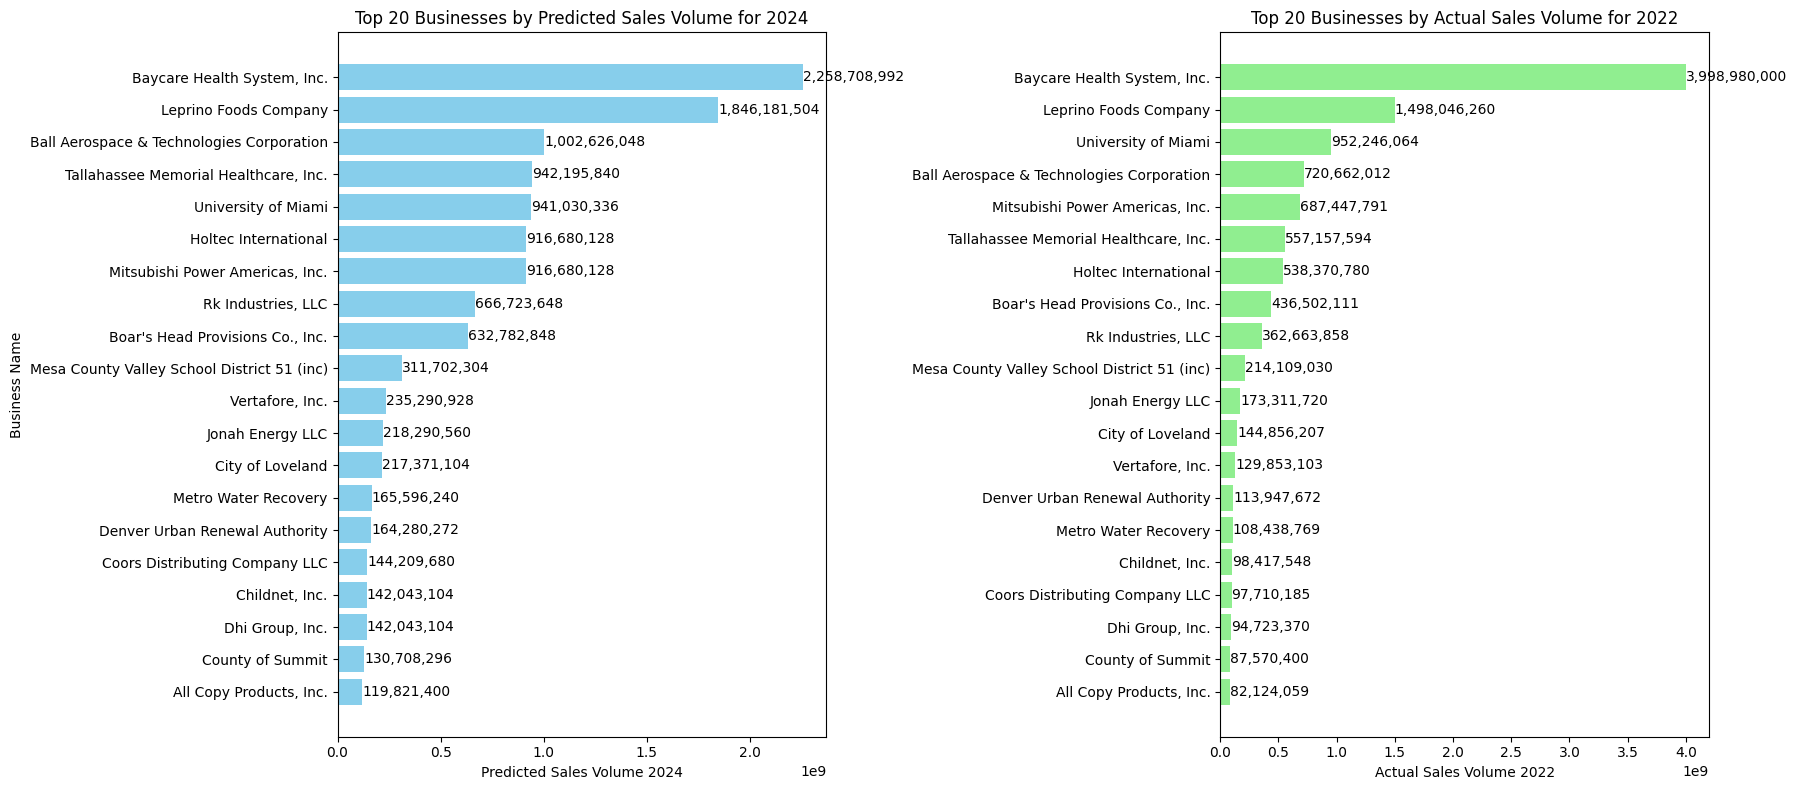

In [ ]:
# Create subplots for side-by-side bar graphs
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(18, 8))

# Bar Graph for Top 20 Businesses by Predicted Network Spend for 2024
bars_2024 = axes[0].barh(top_20_2024['Business_Name'], top_20_2024['SALES_VOLUME_2024_Predicted'], color='skyblue')

# Add values at the end of each bar for 2024
for bar in bars_2024:
    axes[0].text(
        bar.get_width(),  # X-coordinate (width of the bar)
        bar.get_y() + bar.get_height() / 2,  # Y-coordinate (centered on the bar)
        f'{bar.get_width():,.0f}',  # Value displayed at the end of each bar
        va='center',  # Align text vertically
        ha='left',  # Align text horizontally to the left of the bar
        fontsize=10
    )

# Customize the first plot (Predicted Network Spend 2024)
axes[0].set_title('Top 20 Businesses by Predicted Sales Volume for 2024')
axes[0].set_xlabel('Predicted Sales Volume 2024')
axes[0].set_ylabel('Business Name')
axes[0].invert_yaxis()  # To display the largest bar on top

# Bar Graph for Top 20 Businesses by Actual Network Spend for 2022
bars_2022 = axes[1].barh(top_20_2022['Business_Name'], top_20_2022['SALES_VOLUME_2022'], color='lightgreen')

# Add values at the end of each bar for 2022
for bar in bars_2022:
    axes[1].text(
        bar.get_width(),  # X-coordinate (width of the bar)
        bar.get_y() + bar.get_height() / 2,  # Y-coordinate (centered on the bar)
        f'{bar.get_width():,.0f}',  # Value displayed at the end of each bar
        va='center',  # Align text vertically
        ha='left',  # Align text horizontally to the left of the bar
        fontsize=10
    )

# Customize the second plot (Actual Network Spend 2022)
axes[1].set_title('Top 20 Businesses by Actual Sales Volume for 2022')
axes[1].set_xlabel('Actual Sales Volume 2022')
axes[1].invert_yaxis()  # To display the largest bar on top

# Adjust layout
plt.tight_layout()
plt.show()

**Time Series Model (ARIMA) - Sales Volume Growth For Year 2024**

In [ ]:
# Step 1: Import necessary libraries
import pandas as pd
import numpy as np
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_percentage_error
import matplotlib.pyplot as plt

In [ ]:
# Load the data (replace 'telecom_survey_data.csv' with your actual file name)
data = pd.read_csv('/content/telecom_survey_spend_data_2021_2023_pivot.csv')
print(data)

                       Business_Name  EMPLOYEES_HERE  EMPLOYEES_TOTAL  \
0                 1 Hour Signs, Inc.              22               22   
1                  1100 Holding, LLC               0                0   
2              1125 17th Street, LLC               7                7   
3          1140 Edwards Village, LLC               4                4   
4                 11th Ave Hotel Inc              25               25   
...                              ...             ...              ...   
4571       Zoraja & Associates, P.C.               4                4   
4572                Zultimate Denver              10               10   
4573              Zwipe America Inc.              15               15   
4574  Zynda General Contracting Inc.               5                5   
4575                     Grand Total          146599           493038   

      ACTIVE_LOC_EMPS  SALES_VOLUME_2022  SALES_VOLUME_2021  \
0                  22       3.949954e+06       3.349961e+06 

In [ ]:
# Step 3: Prepare the data for ARIMA (focus on network spend data)
# Assuming 'EST_NETWORK_SPEND_2021' and 'EST_NETWORK_SPEND_2022' are the columns for the previous years
network_spend_data = data[['EST_NETWORK_SPEND_2021', 'EST_NETWORK_SPEND_2022']]

**Time Series Model (ARIMA) - Sales Growth For Year 2024**

In [ ]:
# Step 1: Import necessary libraries ARIMA - Sales Growth Prediction
import pandas as pd
import numpy as np
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error
import matplotlib.pyplot as plt

In [ ]:
# Step 2: Load the dataset
data = pd.read_csv('/content/BUS_PROFILE_TELECOM.csv')

In [ ]:
# Remove rows with any null values
#data = data.dropna()
data = data.fillna(0) # Instead of dropping rows, fill NaN values with 0
print(data.columns)

Index(['BUSINESS_NAME', 'STREET_ADDR', 'STREET_ADDR_2', 'CITY', 'STATE_CD',
       'COUNTRY_NAME', 'EMPLOYEES_HERE', 'EMPLOYEES_TOTAL', 'NO_OF_FMLY_MMBRS',
       'YEAR_ESTABLISHED', 'LINE_OF_BUSINESS', 'SALES_VOLUME_USD_2023',
       'SALES_VOLUME_USD_2022', 'SALES_VOLUME_USD_2021', 'EF_ANL_ITBGT',
       'EFF_TOT_CMMNCTN_BLL', 'EF_CORP_DAT_NET_BILL', 'FIBER_INDR',
       'FIBER_DIST_FT', 'HSI_CAPABLE_INDR', 'CS_HSI_MAX_QUAL',
       'CS_HSI_MAX_UP_QUAL', 'CS_HSI_PROVISIONAL_QUAL',
       'DSL_SPEED_UPGRADE_DATE', 'VOIP_CAPABLE_INDR', 'SPEED_ETHCU_MAX',
       'DPV_CONFIRM', 'AVG_3_MO_TOT_REV_AMT', 'EST_NETWORK_SPEND_2023',
       'EST_NETWORK_SPEND_2022', 'EST_NETWORK_SPEND_2021',
       'EST_SECURITY_SPEND_2023', 'EST_SECURITY_SPEND_2022',
       'EST_SECURITY_SPEND_2021', 'EST_SERVICES_SPEND_2023',
       'EST_SERVICES_SPEND_2022', 'EST_SERVICES_SPEND_2021',
       'EST_VOICE_SPEND_2023', 'EST_VOICE_SPEND_2022', 'EST_VOICE_SPEND_2021',
       'EST_TOT_SPEND_2023', 'EST_TOT_SPEND_20

In [ ]:
# Step 3: Prepare the data for ARIMA
# Assume 'SALES_VOLUME_USD_2021', 'SALES_VOLUME_USD_2022', 'SALES_VOLUME_USD_2023' are the columns representing sales volume for different years
# Create a time series by stacking the sales volume
sales_data = data[['SALES_VOLUME_USD_2021', 'SALES_VOLUME_USD_2022', 'SALES_VOLUME_USD_2023']]
sales_ts = sales_data.mean(axis=0)  # Averaging the sales volume for each year (you can adjust as per your need)

In [ ]:
# Step 4: Train the ARIMA model
# Define the ARIMA model (order can be optimized based on ACF/PACF analysis)
# (p, d, q) represent AR terms, differencing, and MA terms respectively
model = ARIMA(sales_ts, order=(1, 1, 1))

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:559: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  _index = to_datetime(index)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:559: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  _index = to_datetime(index)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a 

In [ ]:
# Fit the model
arima_result = model.fit()

# Step 5: Forecast future values (forecasting for 1 year, i.e., 2024)
forecast_steps = 1  # You can increase this number if forecasting multiple periods
forecast = arima_result.forecast(steps=forecast_steps)
print(forecast)

3    1.445419e+07
dtype: float64


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for ARMA and trend. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


In [ ]:
# Step 6: Prepare evaluation
# You can compare the ARIMA model's fitted values against actual historical data for 2023 to evaluate performance
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error, r2_score # import the r2_score function

fitted_values = arima_result.fittedvalues
actual_values = sales_ts

# Evaluate the model using metrics like MSE and MAPE
mse = mean_squared_error(actual_values, fitted_values)
mape = mean_absolute_percentage_error(actual_values, fitted_values)
r2 = r2_score(actual_values, fitted_values)

print(f"Mean Squared Error: {mse}")
print(f"Mean Absolute Percentage Error: {mape * 100}%")
print(f"R² Score: {r2}")

Mean Squared Error: 25955142496545.426
Mean Absolute Percentage Error: 33.339232451492244%
R² Score: -5.01763002844238


Mean Squared Error (MSE): 2.60 × 10¹³, which is quite large, suggesting significant errors in the model's predictions.

Mean Absolute Percentage Error (MAPE): 33.34%, meaning the model's predictions deviate from the actual values by an average of 33.34%. This indicates a relatively high level of error.

R² Score: -5.02, which is a very poor result. An R² score this low suggests that the model performs worse than a simple horizontal line (mean prediction). A negative R² indicates that the model is not fitting the data properly and may be highly inaccurate.

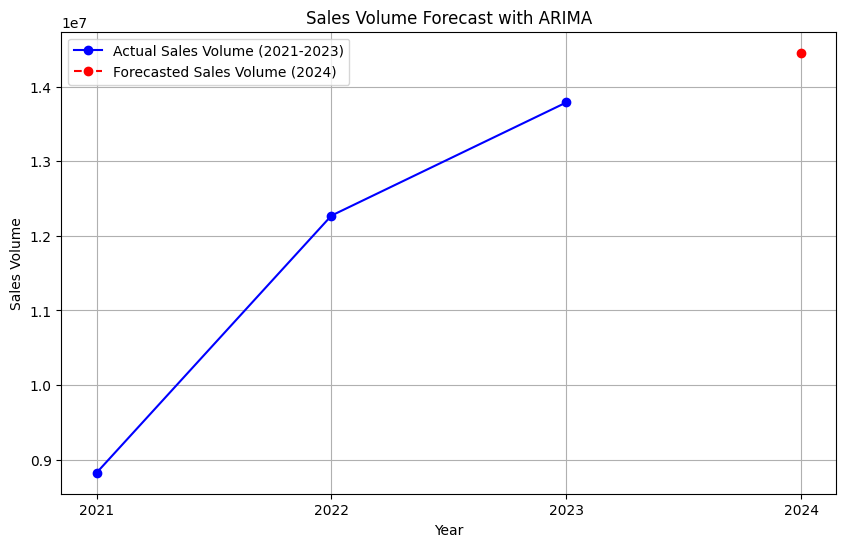

In [ ]:
# Step 7: Visualization with Line Trend Chart

# Combine actual and forecasted revenue for plotting
actual_dates = ['2021', '2022', '2023']
forecasted_dates = ['2024']
combined_dates = actual_dates + forecasted_dates
combined_sales = np.concatenate([fitted_values.values, forecast])

# Plot the actual and forecasted values
plt.figure(figsize=(10, 6))

# Plot actual sales values for 2021-2023
plt.plot(actual_dates, actual_values, label='Actual Sales Volume (2021-2023)', color='blue', marker='o')

# Plot forecasted sales for 2024
plt.plot(forecasted_dates, forecast, label='Forecasted Sales Volume (2024)', color='red', linestyle='--', marker='o')

# Customize the plot
plt.xlabel('Year')
plt.ylabel('Sales Volume')
plt.title('Sales Volume Forecast with ARIMA')
plt.legend()
plt.grid(True)

# Display the plot
plt.show()

In [ ]:
# Step 3: Prepare the data for ARIMA
# Assume 'SALES_VOLUME_USD_2021', 'SALES_VOLUME_USD_2022', 'SALES_VOLUME_USD_2023' are the columns representing sales volume for different years
# Include Business Name field as well
sales_data = data[['BUSINESS_NAME', 'SALES_VOLUME_USD_2021', 'SALES_VOLUME_USD_2022', 'SALES_VOLUME_USD_2023']]

In [ ]:
# Step 4: Train the ARIMA model for each business
# We will apply ARIMA for each business individually
forecasts = []

for idx, row in sales_data.iterrows():
    # Prepare time series data for each business
    sales_ts = row[['SALES_VOLUME_USD_2021', 'SALES_VOLUME_USD_2022', 'SALES_VOLUME_USD_2023']].values

    # Convert sales_ts to numeric type, handling potential errors
    sales_ts = pd.to_numeric(sales_ts, errors='coerce')

    # Train ARIMA model (order can be optimized based on data)
    model = ARIMA(sales_ts, order=(1, 1, 1))
    arima_result = model.fit()

Streaming output truncated to the last 5000 lines.
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for ARMA and trend. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for ARMA and trend. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. 

In [ ]:
# Forecast sales for 2024
forecast = arima_result.forecast(steps=1)

In [ ]:
# Append business name and forecasted sales to the list
forecasts.append([row['BUSINESS_NAME'], forecast[0]])

In [ ]:
# Step 5: Create a DataFrame with Business Names and Forecasted Sales for 2024
forecast_df = pd.DataFrame(forecasts, columns=['BUSINESS_NAME', 'Forecasted_Sales_2024'])

# Step 6: Sort the DataFrame by Forecasted Sales and get the top 50 businesses
top_50_businesses = forecast_df.sort_values(by='Forecasted_Sales_2024', ascending=False).head(50)

In [ ]:
# Step 7: Display the top 50 businesses
print(top_50_businesses)

  BUSINESS_NAME  Forecasted_Sales_2024
0     Wcs, Inc.                    0.0


In [ ]:
# Step 5: Forecast future values (forecasting for 4 quarters in 2024)
forecast_steps = 4
forecast = arima_result.forecast(steps=forecast_steps)

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


In [ ]:
# Step 6: Prepare evaluation
# We'll forecast the values for Q1-Q4 of 2024 using ARIMA and compare with expected values if available
# Since we don't have actual 2024 data, we'll just evaluate using the fitted model

# Here we're just using the model's fitted values for evaluation purposes (fitting it to the training data)
fitted_values = arima_result.fittedvalues

In [ ]:
# Step 7: Evaluation function
def evaluate_model(y_true, y_pred):
    mse = mean_squared_error(y_true, y_pred)
    r2 = r2_score(y_true, y_pred)
    mape = mean_absolute_percentage_error(y_true, y_pred)

    print(f"Mean Squared Error (MSE): {mse}")
    print(f"R-Squared (R²): {r2}")
    print(f"Mean Absolute Percentage Error (MAPE): {mape * 100}%")
    print('-' * 50)

In [ ]:
# Evaluate the ARIMA model on the actual values from 2022 and 2023
evaluate_model(actual_revenue, fitted_values)

Mean Squared Error (MSE): 259698.44425393062
R-Squared (R²): -0.3278317051014008
Mean Absolute Percentage Error (MAPE): 16.786996842720377%
--------------------------------------------------


In [ ]:
# Combine actual and forecasted revenue for plotting
combined_revenue = np.concatenate((actual_revenue, forecast))

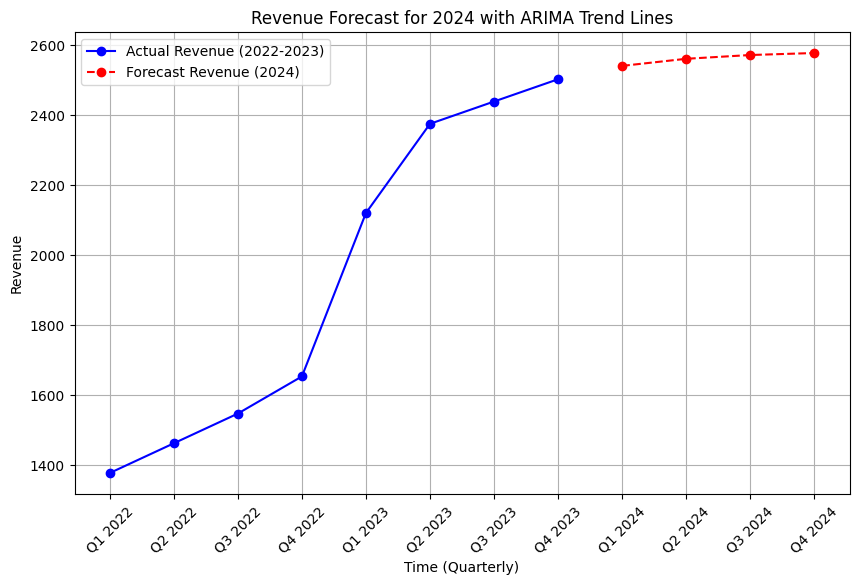

In [ ]:
# Prepare x-axis labels for plotting
time_labels = ['Q1 2022', 'Q2 2022', 'Q3 2022', 'Q4 2022', 'Q1 2023', 'Q2 2023', 'Q3 2023', 'Q4 2023',
               'Q1 2024', 'Q2 2024', 'Q3 2024', 'Q4 2024']

# Plot the actual and forecasted values
plt.figure(figsize=(10, 6))
x_actual = np.arange(len(actual_revenue))  # X-axis for actual values (2022-2023)
plt.plot(x_actual, actual_revenue, label='Actual Revenue (2022-2023)', color='blue', linestyle='-', marker='o')

# X-axis for forecasted values (2024)
x_forecast = np.arange(len(actual_revenue), len(combined_revenue))  # Continue from the end of actual values
plt.plot(x_forecast, forecast, label='Forecast Revenue (2024)', color='red', linestyle='--', marker='o')

# Customize the plot
plt.xticks(ticks=np.arange(len(time_labels)), labels=time_labels, rotation=45)
plt.title('Revenue Forecast for 2024 with ARIMA Trend Lines')
plt.xlabel('Time (Quarterly)')
plt.ylabel('Revenue')
plt.legend()
plt.grid(True)

# Display the plot
plt.show()

In [ ]:
# Step 10: Add Business name to Forecasted Revnue for 2024 and Actual Spend Data for 2023 aswell

Revenue Forecast using SARIMA

In [ ]:
# Importing the required libraries for SARIMA
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_squared_error

In [ ]:
# Load the data (replace 'telecom_survey_data.csv' with your actual file name)
data = pd.read_csv('/content/telecom_survey_data_quarterly_2021_23.csv')

In [ ]:
# Step 2: Prepare data
# Use quarterly revenues from 2022 and 2023 to forecast 2024
features_sarima = [
    'Q1_REV_AMT_2022', 'Q2_REV_AMT_2022', 'Q3_REV_AMT_2022', 'Q4_REV_AMT_2022',
    'Q1_REV_AMT_2023', 'Q2_REV_AMT_2023', 'Q3_REV_AMT_2023', 'Q4_REV_AMT_2023'
]
features_data = data[features_sarima].mean(axis=0)

In [ ]:
print(features_data)

Q1_REV_AMT_2022    1378.360811
Q2_REV_AMT_2022    1463.175874
Q3_REV_AMT_2022    1548.004316
Q4_REV_AMT_2022    1654.021364
Q1_REV_AMT_2023    2120.543159
Q2_REV_AMT_2023    2375.018990
Q3_REV_AMT_2023    2438.637031
Q4_REV_AMT_2023    2502.250971
dtype: float64


In [ ]:
# Step 4: Train the SARIMA model
# Define the SARIMA model parameters (p, d, q) for non-seasonal part and (P, D, Q, m) for seasonal part
sarima_model = SARIMAX(actual_revenue, order=(1, 1, 1), seasonal_order=(1, 1, 1, 4))

# Fit the model
sarima_result = sarima_model.fit()

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:559: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  _index = to_datetime(index)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:559: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  _index = to_datetime(index)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a 

In [ ]:
# Step 5: Forecast future values (forecasting for 4 quarters in 2024)
forecast_steps = 4  # Forecast for the next 4 quarters (2024)
forecast = sarima_result.forecast(steps=forecast_steps)

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


In [ ]:
# Step 6: Prepare evaluation
# We'll evaluate the SARIMA model's fitted values using the actual revenue data from 2022 and 2023
fitted_values = sarima_result.fittedvalues

In [ ]:
# Step 7: Evaluation function
def evaluate_model(y_true, y_pred):
    mse = mean_squared_error(y_true, y_pred)
    r2 = r2_score(y_true, y_pred)
    mape = mean_absolute_percentage_error(y_true, y_pred)

    print(f"Mean Squared Error (MSE): {mse}")
    print(f"R-Squared (R²): {r2}")
    print(f"Mean Absolute Percentage Error (MAPE): {mape * 100}%")
    print('-' * 50)

In [ ]:
# Evaluate the SARIMA model on the actual values from 2022 and 2023
evaluate_model(actual_revenue, fitted_values)

Mean Squared Error (MSE): 250739.3862011442
R-Squared (R²): -0.2820242634568837
Mean Absolute Percentage Error (MAPE): 17.374529399053245%
--------------------------------------------------


In [ ]:
# Step 8: Visualization with Line Trend Chart

# Combine actual and forecasted revenue for plotting
combined_revenue = np.concatenate((actual_revenue, forecast))

# Prepare x-axis labels for plotting
time_labels = ['Q1 2022', 'Q2 2022', 'Q3 2022', 'Q4 2022', 'Q1 2023', 'Q2 2023', 'Q3 2023', 'Q4 2023',
               'Q1 2024', 'Q2 2024', 'Q3 2024', 'Q4 2024']

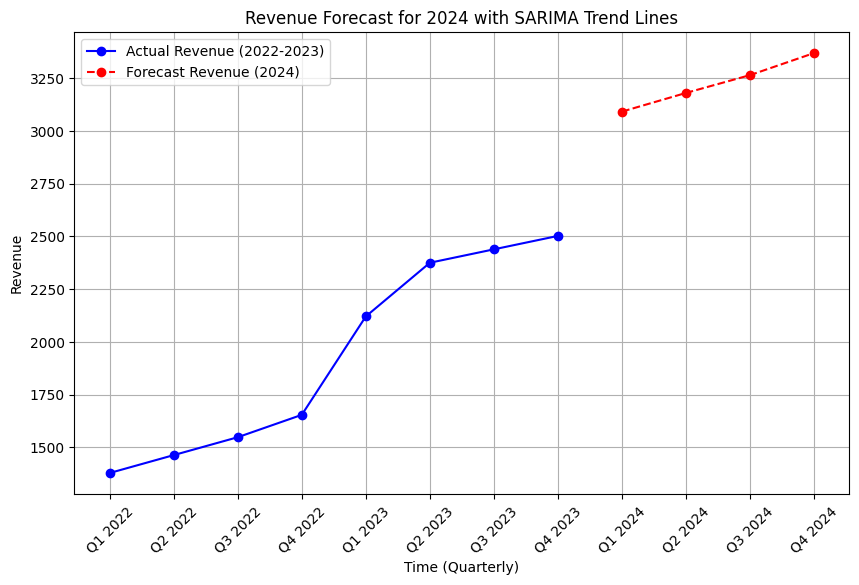

In [ ]:
# Plot the actual and forecasted values
plt.figure(figsize=(10, 6))
x_actual = np.arange(len(actual_revenue))  # X-axis for actual values (2022-2023)
plt.plot(x_actual, actual_revenue, label='Actual Revenue (2022-2023)', color='blue', linestyle='-', marker='o')

# X-axis for forecasted values (2024)
x_forecast = np.arange(len(actual_revenue), len(combined_revenue))  # Continue from the end of actual values
plt.plot(x_forecast, forecast, label='Forecast Revenue (2024)', color='red', linestyle='--', marker='o')

# Customize the plot
plt.xticks(ticks=np.arange(len(time_labels)), labels=time_labels, rotation=45)
plt.title('Revenue Forecast for 2024 with SARIMA Trend Lines')
plt.xlabel('Time (Quarterly)')
plt.ylabel('Revenue')
plt.legend()
plt.grid(True)

# Display the plot
plt.show()

In [ ]:
# Step 10: Add Business name to Forecasted Revnue for 2024 and Actual Spend Data for 2023 aswell

Revenue Forecast Using PROPHET Model - 2024

In [ ]:
# Install the required package for PROPHET Model if not already installed
!pip install prophet

In [ ]:
# Importing required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from prophet import Prophet
from sklearn.metrics import mean_squared_error

In [ ]:
# Load the data (replace 'telecom_survey_data.csv' with your actual file name)
data = pd.read_csv('/content/telecom_survey_data_quarterly_2021_23.csv')

In [ ]:
# EDA: Selecting the relevant revenue columns
revenue_columns_prop = ['Q1_REV_AMT_2022', 'Q2_REV_AMT_2022', 'Q3_REV_AMT_2022', 'Q4_REV_AMT_2022',
                   'Q1_REV_AMT_2023', 'Q2_REV_AMT_2023', 'Q3_REV_AMT_2023', 'Q4_REV_AMT_2023']

In [ ]:
# Creating a time series of quarterly revenue data
revenue_data = data[revenue_columns_prop].mean(axis=0)

# Converting to a time series with quarterly index
revenue_data.index = pd.date_range(start='2022Q1', periods=len(revenue_data), freq='Q')

<ipython-input-162-7d73918147a8>:5: FutureWarning: 'Q' is deprecated and will be removed in a future version, please use 'QE' instead.
  revenue_data.index = pd.date_range(start='2022Q1', periods=len(revenue_data), freq='Q')


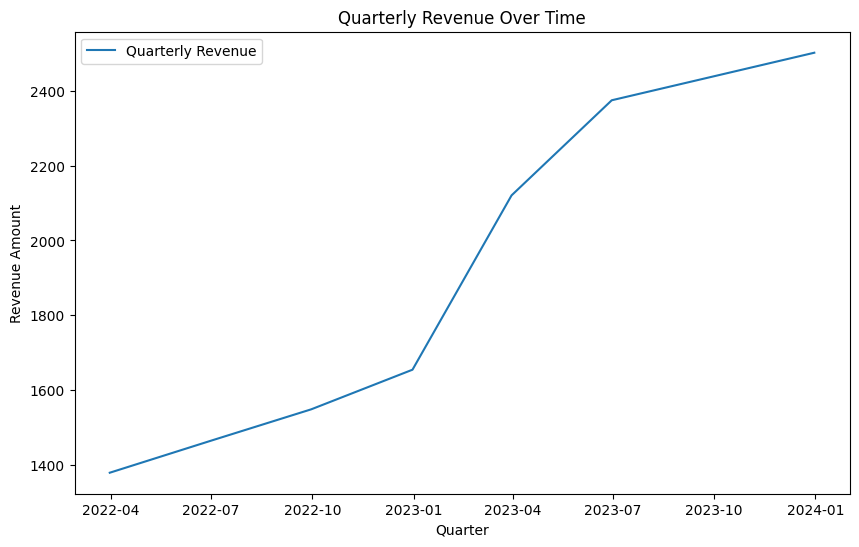

In [ ]:
# Plot the quarterly revenue data
plt.figure(figsize=(10, 6))
plt.plot(revenue_data, label='Quarterly Revenue')
plt.title('Quarterly Revenue Over Time')
plt.xlabel('Quarter')
plt.ylabel('Revenue Amount')
plt.legend()
plt.show()

In [ ]:
# prompt: prepare the data for the  prophet

# Prepare the data for Prophet
df_prophet = pd.DataFrame({'ds': revenue_data.index, 'y': revenue_data.values})

# Train the Prophet model
prophet_model = Prophet(seasonality_mode='multiplicative', yearly_seasonality=True)
prophet_model.fit(df_prophet)

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:prophet:n_changepoints greater than number of observations. Using 5.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpiwddbck1/pffvoru9.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpiwddbck1/vbajpyiv.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=60476', 'data', 'file=/tmp/tmpiwddbck1/pffvoru9.json', 'init=/tmp/tmpiwddbck1/vbajpyiv.json', 'output', 'file=/tmp/tmpiwddbck1/prophet_modeljxgbdlwv/prophet_model-20241002095848.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
09:58:48 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
09:58:50 - cmdstanpy - INFO - Chain [1] done processing
INFO:c

In [ ]:
# Forecasting for 2024 (next 4 quarters)
future = prophet_model.make_future_dataframe(periods=4, freq='Q')  # Next 4 quarters
forecast = prophet_model.predict(future)

/usr/local/lib/python3.10/dist-packages/prophet/forecaster.py:1854: FutureWarning: 'Q' is deprecated and will be removed in a future version, please use 'QE' instead.
  dates = pd.date_range(


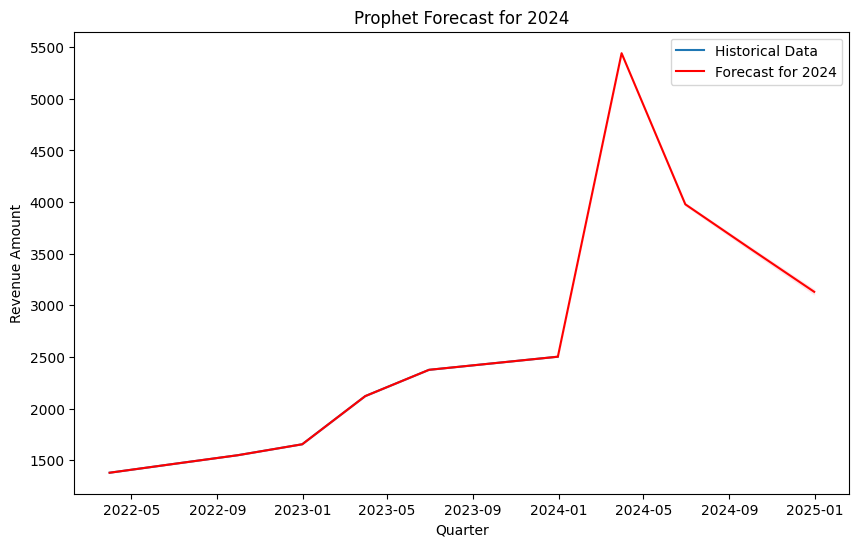

In [ ]:
# prompt: plot the forecast

# Plotting the forecast
plt.figure(figsize=(10, 6))
plt.plot(df_prophet['ds'], df_prophet['y'], label='Historical Data')
plt.plot(forecast['ds'], forecast['yhat'], label='Forecast for 2024', color='red')
plt.fill_between(forecast['ds'].values, forecast['yhat_lower'].values, forecast['yhat_upper'].values, color='pink', alpha=0.3)
plt.title('Prophet Forecast for 2024')
plt.xlabel('Quarter')
plt.ylabel('Revenue Amount')
plt.legend()
plt.show()

/usr/local/lib/python3.10/dist-packages/prophet/plot.py:72: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()
/usr/local/lib/python3.10/dist-packages/prophet/plot.py:73: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  ax.plot(m.history['ds'].dt.to_pydatetime(), m.history['y'], 'k.',


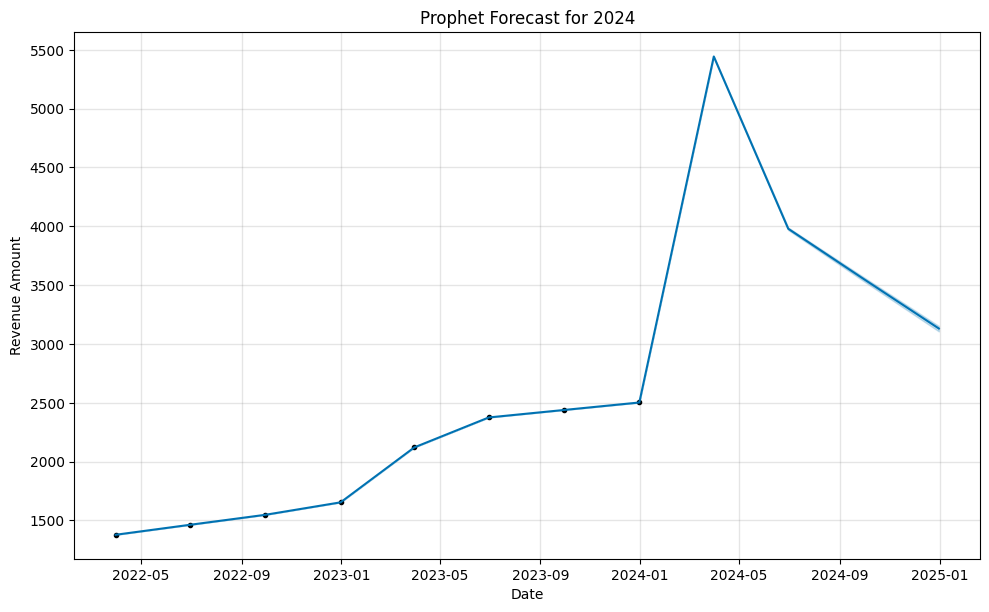

In [ ]:
# Plotting the forecast
fig = prophet_model.plot(forecast)
plt.title('Prophet Forecast for 2024')
plt.xlabel('Date')
plt.ylabel('Revenue Amount')
plt.show()

/usr/local/lib/python3.10/dist-packages/prophet/plot.py:228: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()
/usr/local/lib/python3.10/dist-packages/prophet/plot.py:351: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  df_y['ds'].dt.to_pydatetime(), seas[name], ls='-', c='#0072B2')
/usr/local/lib/python3.10/dist-packages/prophet/plot.py:354: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` o

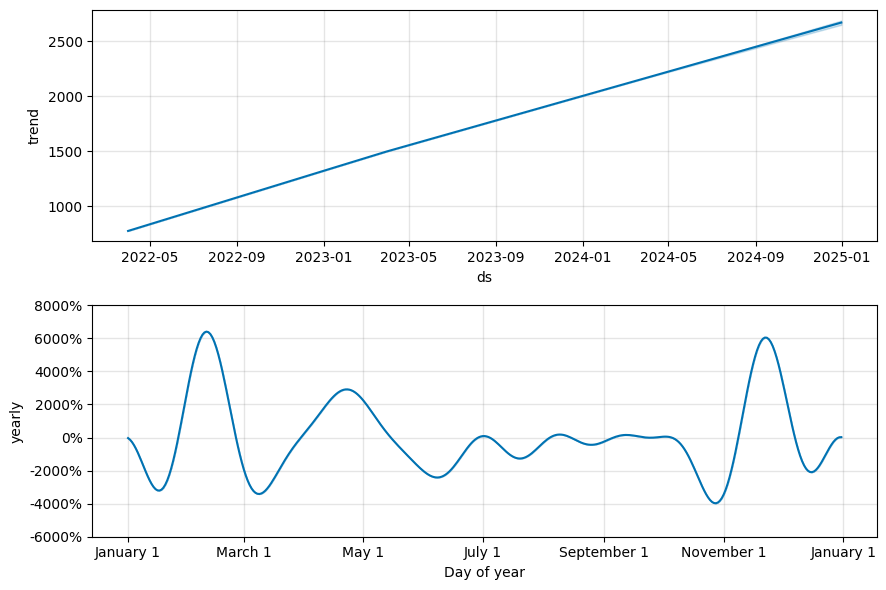

In [ ]:
# Plotting the forecast components (trend, yearly seasonality)
fig2 = prophet_model.plot_components(forecast)
plt.show()

In [ ]:
# prompt: evaluate the model on MSE,MAPE,R2

# Assuming you have actual values for the last few quarters for testing
# Replace this with your actual test data
test_data = revenue_data[-4:]  # Last 4 quarters for testing
# Get the predicted values for the test data
predictions = forecast['yhat'][-4:]

# Calculate MSE
mse = mean_squared_error(test_data, predictions)
print(f"MSE: {mse}")

# Calculate MAPE
mape = mean_absolute_percentage_error(test_data, predictions)
print(f"MAPE: {mape}")

# Calculate R-squared
r2 = r2_score(test_data, predictions)
print(f"R-squared: {r2}")

MSE: 3809310.908850695
MAPE: 0.7373042290962146
R-squared: -180.43653834928136


In [ ]:
# Step 10: Add Business name to Forecasted Revnue for 2024 and Actual Spend Data for 2023 aswell

Forecast for Year 2023

In [ ]:
# Linear Regression
# Load the data (replace 'telecom_survey_data.csv' with your actual file name)
data = pd.read_csv('/content/telecom_survey_data_quarterly_2021_23.csv')

# Step 2: Prepare data
# Use quarterly revenues from 2022 and 2023 to forecast 2024
features_lr = [
    'Q1_REV_AMT_2021', 'Q2_REV_AMT_2021', 'Q3_REV_AMT_2021', 'Q4_REV_AMT_2021',
    'Q1_REV_AMT_2022', 'Q2_REV_AMT_2022', 'Q3_REV_AMT_2022', 'Q4_REV_AMT_2022'
]
features_data = data[features_lr].mean(axis=0)

# Print Value
print(features_data)

Q1_REV_AMT_2021     848.224860
Q2_REV_AMT_2021     975.450798
Q3_REV_AMT_2021    1081.487052
Q4_REV_AMT_2021    1229.918429
Q1_REV_AMT_2022    1378.360811
Q2_REV_AMT_2022    1463.175874
Q3_REV_AMT_2022    1548.004316
Q4_REV_AMT_2022    1654.021364
dtype: float64


In [ ]:
# Step 3: Import necessary libraries for building model & evaluation
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_percentage_error
from sklearn.linear_model import LinearRegression

In [ ]:
# Step 4: Prepare data
# Assuming features_lr is already defined and contains the appropriate columns
X = data[features_lr]

# For simplicity, using 2022 as a proxy for the target (since 2023 data isn't available)
y_Q1 = data['Q1_REV_AMT_2022']
y_Q2 = data['Q2_REV_AMT_2022']
y_Q3 = data['Q3_REV_AMT_2022']
y_Q4 = data['Q4_REV_AMT_2022']

In [ ]:
# Step 5: Forecasting for all four quarters in 2024
# Initialize the Linear Regression model
model = LinearRegression()

In [ ]:
# Step 6: Train and Predict
# Forecast for Q1 2023
model.fit(X, y_Q1)  # Training on 2022 data to predict 2023 (assumed scenario)
y_pred_Q1 = model.predict(X)

# Forecast for Q2 2024
model.fit(X, y_Q2)
y_pred_Q2 = model.predict(X)

# Forecast for Q3 2024
model.fit(X, y_Q3)
y_pred_Q3 = model.predict(X)

# Forecast for Q4 2024
model.fit(X, y_Q4)
y_pred_Q4 = model.predict(X)

In [ ]:
# Step 7: Evaluation Function
def evaluate_model(y_true, y_pred, quarter):
    mse = mean_squared_error(y_true, y_pred)
    r2 = r2_score(y_true, y_pred)
    mape = mean_absolute_percentage_error(y_true, y_pred)

    print(f"Evaluation for {quarter}:")
    print(f"Mean Squared Error (MSE): {mse}")
    print(f"R-Squared (R²): {r2}")
    print(f"Mean Absolute Percentage Error (MAPE): {mape * 100}%")
    print('-' * 50)

In [ ]:
# Step 8: Evaluate for each quarter
evaluate_model(y_Q1, y_pred_Q1, 'Q1 2023')
evaluate_model(y_Q2, y_pred_Q2, 'Q2 2023')
evaluate_model(y_Q3, y_pred_Q3, 'Q3 2023')
evaluate_model(y_Q4, y_pred_Q4, 'Q4 2023')

Evaluation for Q1 2023:
Mean Squared Error (MSE): 1.6261820059736552e-25
R-Squared (R²): 1.0
Mean Absolute Percentage Error (MAPE): 0.06743634009495672%
--------------------------------------------------
Evaluation for Q2 2023:
Mean Squared Error (MSE): 2.0605867074798384e-24
R-Squared (R²): 1.0
Mean Absolute Percentage Error (MAPE): 883.9015968925341%
--------------------------------------------------
Evaluation for Q3 2023:
Mean Squared Error (MSE): 9.22702260693002e-24
R-Squared (R²): 1.0
Mean Absolute Percentage Error (MAPE): 1767.803193785068%
--------------------------------------------------
Evaluation for Q4 2023:
Mean Squared Error (MSE): 6.258022528620196e-25
R-Squared (R²): 1.0
Mean Absolute Percentage Error (MAPE): 441.950798446267%
--------------------------------------------------


In [ ]:
# Step 9: Combine results into a dataframe for easy handling and visualization
forecast_df = pd.DataFrame({
    'Q1_2021': data['Q1_REV_AMT_2021'],
    'Q2_2021': data['Q2_REV_AMT_2021'],
    'Q3_2021': data['Q3_REV_AMT_2021'],
    'Q4_2021': data['Q4_REV_AMT_2021'],
    'Q1_2022': data['Q1_REV_AMT_2022'],
    'Q2_2022': data['Q2_REV_AMT_2022'],
    'Q3_2022': data['Q3_REV_AMT_2022'],
    'Q4_2022': data['Q4_REV_AMT_2022'],
    'Forecast_Q1_2023': y_pred_Q1,
    'Forecast_Q2_2023': y_pred_Q2,
    'Forecast_Q3_2023': y_pred_Q3,
    'Forecast_Q4_2023': y_pred_Q4
})

In [ ]:
# Visualization with Trend Lines
# Prepare time data points for the x-axis
quarters = ['Q1', 'Q2', 'Q3', 'Q4']
years = ['2021', '2022', '2023']

In [ ]:
# Create x-axis labels combining years and quarters
time_labels = [f"{q} {y}" for y in years for q in quarters]

# Flatten the data for plotting trend lines
actual_values_2021_2022 = forecast_df[['Q1_2021', 'Q2_2021', 'Q3_2021', 'Q4_2021',
                                       'Q1_2022', 'Q2_2022', 'Q3_2022', 'Q4_2022']].mean().values

forecast_values_2023 = forecast_df[['Forecast_Q1_2023', 'Forecast_Q2_2023', 'Forecast_Q3_2023', 'Forecast_Q4_2023']].mean().values

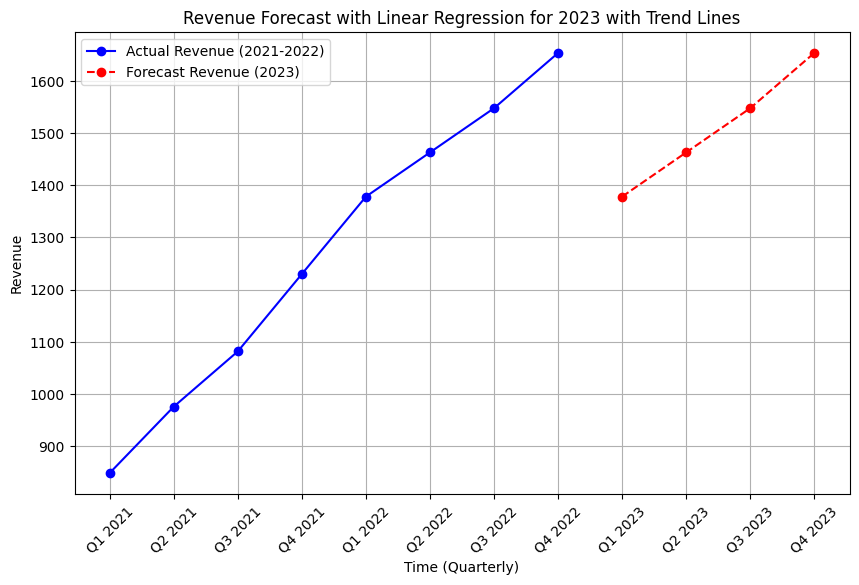

In [ ]:
# Plot the trend line for actual revenue (2021 and 2022)
#!pip install matplotlib
import matplotlib.pyplot as plt
import numpy as np #Added this line to import the numpy module and alias it as np

plt.figure(figsize=(10, 6))
x_actual = np.arange(1, 9)  # 8 points for 2022 and 2023
plt.plot(x_actual, actual_values_2021_2022, label='Actual Revenue (2021-2022)', color='blue', marker='o')

# Plot the trend line for forecasted revenue (2024)
x_forecast = np.arange(9, 13)  # 4 points for 2024
plt.plot(x_forecast, forecast_values_2023, label='Forecast Revenue (2023)', color='red', marker='o', linestyle='--')

# Customize the plot
plt.xticks(ticks=np.arange(1, 13), labels=time_labels, rotation=45)
plt.title('Revenue Forecast with Linear Regression for 2023 with Trend Lines')
plt.xlabel('Time (Quarterly)')
plt.ylabel('Revenue')
plt.legend()
plt.grid(True)

# Display the plot
plt.show()

In [ ]:
# Random Forest - Forecast 2023
# Step 1: Import necessary libraries
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
# Load the data (replace 'telecom_survey_data.csv' with your actual file name)
data = pd.read_csv('/content/telecom_survey_data_quarterly_2021_23.csv')

# Step 2: Prepare data
# Use quarterly revenues from 2022 and 2023 to forecast 2024
features_rf = [
    'Q1_REV_AMT_2021', 'Q2_REV_AMT_2021', 'Q3_REV_AMT_2021', 'Q4_REV_AMT_2021',
    'Q1_REV_AMT_2022', 'Q2_REV_AMT_2022', 'Q3_REV_AMT_2022', 'Q4_REV_AMT_2022'
]
features_data = data[features_rf].mean(axis=0)

# Print Value
print(features_data)

Q1_REV_AMT_2021     848.224860
Q2_REV_AMT_2021     975.450798
Q3_REV_AMT_2021    1081.487052
Q4_REV_AMT_2021    1229.918429
Q1_REV_AMT_2022    1378.360811
Q2_REV_AMT_2022    1463.175874
Q3_REV_AMT_2022    1548.004316
Q4_REV_AMT_2022    1654.021364
dtype: float64


In [ ]:
# Step 3: Prepare data
# Assuming features_lr is already defined and contains the appropriate columns
X = data[features_rf]

# For simplicity, using 2022 as a proxy for the target (since 2023 data isn't available)
y_Q1 = data['Q1_REV_AMT_2022']
y_Q2 = data['Q2_REV_AMT_2022']
y_Q3 = data['Q3_REV_AMT_2022']
y_Q4 = data['Q4_REV_AMT_2022']

In [ ]:
# Step 4: Import necessary libraries
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_percentage_error

In [ ]:
# Step 5: Forecasting for all four quarters in 2023
# Initialize the Random Forest Regressor
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)

In [ ]:
# Step 6: Train and Predict for each quarter
# Forecast for Q1 2024
rf_model.fit(X, y_Q1)
y_pred_Q1 = rf_model.predict(X)

# Forecast for Q2 2024
rf_model.fit(X, y_Q2)
y_pred_Q2 = rf_model.predict(X)

# Forecast for Q3 2024
rf_model.fit(X, y_Q3)
y_pred_Q3 = rf_model.predict(X)

# Forecast for Q4 2024
rf_model.fit(X, y_Q4)
y_pred_Q4 = rf_model.predict(X)

In [ ]:
# Step 7: Evaluation Function
def evaluate_model(y_true, y_pred, quarter):
    mse = mean_squared_error(y_true, y_pred)
    r2 = r2_score(y_true, y_pred)
    mape = mean_absolute_percentage_error(y_true, y_pred)

    print(f"Evaluation for {quarter}:")
    print(f"Mean Squared Error (MSE): {mse}")
    print(f"R-Squared (R²): {r2}")
    print(f"Mean Absolute Percentage Error (MAPE): {mape * 100}%")
    print('-' * 50)

# Step 8: Evaluate for each quarter
evaluate_model(y_Q1, y_pred_Q1, 'Q1 2023')
evaluate_model(y_Q2, y_pred_Q2, 'Q2 2023')
evaluate_model(y_Q3, y_pred_Q3, 'Q3 2023')
evaluate_model(y_Q4, y_pred_Q4, 'Q4 2023')

Evaluation for Q1 2023:
Mean Squared Error (MSE): 32685.339384397957
R-Squared (R²): 0.997834554403454
Mean Absolute Percentage Error (MAPE): 19437201671862.37%
--------------------------------------------------
Evaluation for Q2 2023:
Mean Squared Error (MSE): 36832.316782434216
R-Squared (R²): 0.997834530287418
Mean Absolute Percentage Error (MAPE): 0.06057228573704543%
--------------------------------------------------
Evaluation for Q3 2023:
Mean Squared Error (MSE): 41225.71060707813
R-Squared (R²): 0.9978345832345852
Mean Absolute Percentage Error (MAPE): 0.05809831647353835%
--------------------------------------------------
Evaluation for Q4 2023:
Mean Squared Error (MSE): 47067.80744542514
R-Squared (R²): 0.9978345181534981
Mean Absolute Percentage Error (MAPE): 0.051937101075578064%
--------------------------------------------------


In [ ]:
# Step 9: Combine results into a dataframe for easy handling and visualization
forecast_df = pd.DataFrame({
    'Q1_2021': data['Q1_REV_AMT_2021'],
    'Q2_2021': data['Q2_REV_AMT_2021'],
    'Q3_2021': data['Q3_REV_AMT_2021'],
    'Q4_2021': data['Q4_REV_AMT_2021'],
    'Q1_2022': data['Q1_REV_AMT_2022'],
    'Q2_2022': data['Q2_REV_AMT_2022'],
    'Q3_2022': data['Q3_REV_AMT_2022'],
    'Q4_2022': data['Q4_REV_AMT_2022'],
    'Forecast_Q1_2023': y_pred_Q1,
    'Forecast_Q2_2023': y_pred_Q2,
    'Forecast_Q3_2023': y_pred_Q3,
    'Forecast_Q4_2023': y_pred_Q4
})

In [ ]:
# Create x-axis labels combining years and quarters
time_labels = [f"{q} {y}" for y in years for q in quarters]

# Flatten the data for plotting trend lines
actual_values_2021_2022 = forecast_df[['Q1_2021', 'Q2_2021', 'Q3_2021', 'Q4_2021',
                                       'Q1_2022', 'Q2_2022', 'Q3_2022', 'Q4_2022']].mean().values

forecast_values_2023 = forecast_df[['Forecast_Q1_2023', 'Forecast_Q2_2023', 'Forecast_Q3_2023', 'Forecast_Q4_2023']].mean().values

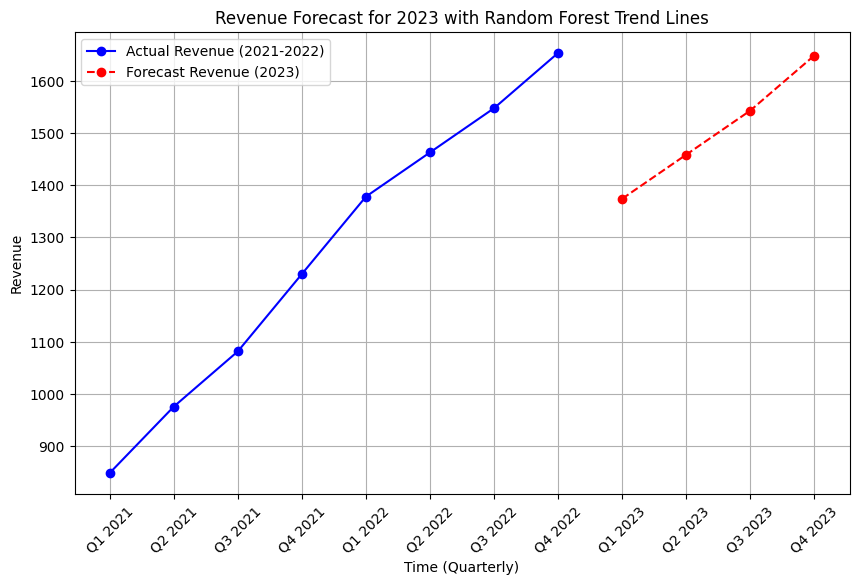

In [ ]:
# Plot the trend line for actual revenue (2022 and 2023)
#!pip install matplotlib
import matplotlib.pyplot as plt
import numpy as np
# Plot the trend line for actual revenue (2021 and 2022)
plt.figure(figsize=(10, 6))
x_actual = np.arange(1, 9)  # 8 points for 2022 and 2023

# Calculate the average revenue for each quarter across all entities
average_revenue = actual_values_2021_2022.reshape(-1, 8).mean(axis=0)

plt.plot(x_actual, average_revenue, label='Actual Revenue (2021-2022)', color='blue', marker='o')

# Plot the trend line for forecasted revenue (2023)
x_forecast = np.arange(9, 13)  # 4 points for 2023

# Calculate the average forecasted revenue for each quarter
average_forecast = forecast_values_2023.reshape(-1, 4).mean(axis=0)

plt.plot(x_forecast, average_forecast, label='Forecast Revenue (2023)', color='red', marker='o', linestyle='--')

# Customize the plot
plt.xticks(ticks=np.arange(1, 13), labels=time_labels, rotation=45)
plt.title('Revenue Forecast for 2023 with Random Forest Trend Lines')
plt.xlabel('Time (Quarterly)')
plt.ylabel('Revenue')
plt.legend()
plt.grid(True)

# Display the plot
plt.show()

In [ ]:
# ARIMA Model - Forecast
# Importing the required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error

In [ ]:
# Load the data (replace 'telecom_survey_data.csv' with your actual file name)
data = pd.read_csv('/content/telecom_survey_data_quarterly_2021_23.csv')

# Step 2: Prepare data
# Use quarterly revenues from 2021 and 2022 to forecast 2023
features_arima = [
    'Q1_REV_AMT_2021', 'Q2_REV_AMT_2021', 'Q3_REV_AMT_2021', 'Q4_REV_AMT_2021',
    'Q1_REV_AMT_2022', 'Q2_REV_AMT_2022', 'Q3_REV_AMT_2022', 'Q4_REV_AMT_2022'
]
features_data = data[features_arima].mean(axis=0)

# Print Value
print(features_data)

Q1_REV_AMT_2021     848.224860
Q2_REV_AMT_2021     975.450798
Q3_REV_AMT_2021    1081.487052
Q4_REV_AMT_2021    1229.918429
Q1_REV_AMT_2022    1378.360811
Q2_REV_AMT_2022    1463.175874
Q3_REV_AMT_2022    1548.004316
Q4_REV_AMT_2022    1654.021364
dtype: float64


In [ ]:
# Step 3: Prepare data
# Assuming features_arima is already defined and contains the appropriate columns
X = data[features_arima]

# For simplicity, using 2022 as a proxy for the target (since 2023 data isn't available)
y_Q1 = data['Q1_REV_AMT_2022']
y_Q2 = data['Q2_REV_AMT_2022']
y_Q3 = data['Q3_REV_AMT_2022']
y_Q4 = data['Q4_REV_AMT_2022']

In [ ]:
# Step 4: Prepare the data for ARIMA
# We'll use actual quarterly revenue from 2021 and 2022 for building the model and forecasting
actual_revenue = data[['Q1_REV_AMT_2021', 'Q2_REV_AMT_2021', 'Q3_REV_AMT_2021', 'Q4_REV_AMT_2021',
                       'Q1_REV_AMT_2022', 'Q2_REV_AMT_2022', 'Q3_REV_AMT_2022', 'Q4_REV_AMT_2022']].mean(axis=0)

In [ ]:
# Step 4: Train the ARIMA model
# Define the ARIMA model parameters (p, d, q)
model = ARIMA(actual_revenue, order=(1, 1, 1))  # Example: p=1, d=1, q=1

# Fit the model
arima_result = model.fit()

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:559: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  _index = to_datetime(index)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:559: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  _index = to_datetime(index)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a 

In [ ]:
# Step 5: Forecast future values (forecasting for 4 quarters in 2023)
forecast_steps = 4
forecast = arima_result.forecast(steps=forecast_steps)

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


In [ ]:
# Step 6: Prepare evaluation
# We'll forecast the values for Q1-Q4 of 2023 using ARIMA and compare with expected values if available
# Since we don't have actual 2023 data, we'll just evaluate using the fitted model

# Here we're just using the model's fitted values for evaluation purposes (fitting it to the training data)
fitted_values = arima_result.fittedvalues

In [ ]:
# Step 7: Evaluation function
def evaluate_model(y_true, y_pred):
    mse = mean_squared_error(y_true, y_pred)
    r2 = r2_score(y_true, y_pred)
    mape = mean_absolute_percentage_error(y_true, y_pred)

    print(f"Mean Squared Error (MSE): {mse}")
    print(f"R-Squared (R²): {r2}")
    print(f"Mean Absolute Percentage Error (MAPE): {mape * 100}%")
    print('-' * 50)

# Evaluate the ARIMA model on the actual values from 2021 and 2022
evaluate_model(actual_revenue, fitted_values)

Mean Squared Error (MSE): 92393.5702438427
R-Squared (R²): -0.28419935810433206
Mean Absolute Percentage Error (MAPE): 15.51714215936115%
--------------------------------------------------


In [ ]:
# Combine actual and forecasted revenue for plotting
combined_revenue = np.concatenate((actual_revenue, forecast))

# Prepare x-axis labels for plotting
time_labels = ['Q1 2021', 'Q2 2021', 'Q3 2021', 'Q4 2021', 'Q1 2022', 'Q2 2022', 'Q3 2022', 'Q4 2022',
               'Q1 2023', 'Q2 2023', 'Q3 2023', 'Q4 2023']

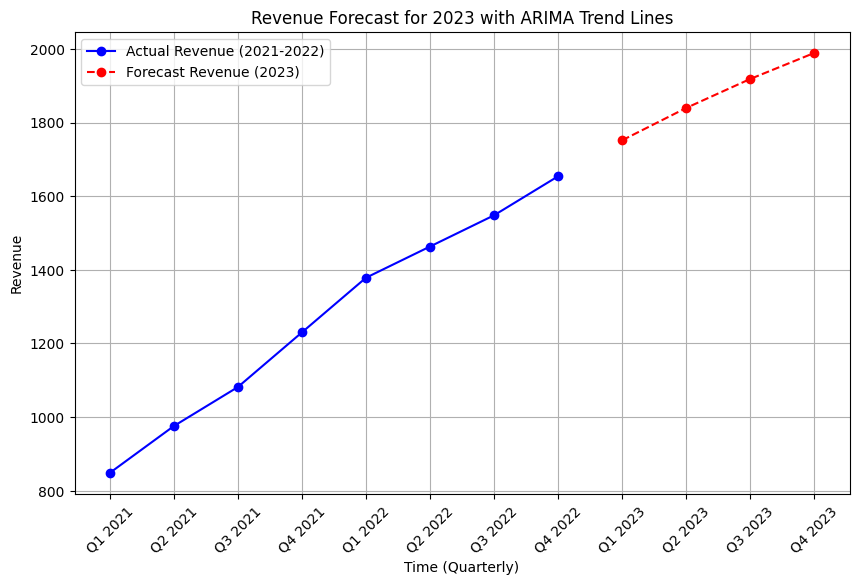

In [ ]:
# Plot the actual and forecasted values
plt.figure(figsize=(10, 6))
x_actual = np.arange(len(actual_revenue))  # X-axis for actual values (2022-2023)
plt.plot(x_actual, actual_revenue, label='Actual Revenue (2021-2022)', color='blue', linestyle='-', marker='o')

# X-axis for forecasted values (2023)
x_forecast = np.arange(len(actual_revenue), len(combined_revenue))  # Continue from the end of actual values
plt.plot(x_forecast, forecast, label='Forecast Revenue (2023)', color='red', linestyle='--', marker='o')

# Customize the plot
plt.xticks(ticks=np.arange(len(time_labels)), labels=time_labels, rotation=45)
plt.title('Revenue Forecast for 2023 with ARIMA Trend Lines')
plt.xlabel('Time (Quarterly)')
plt.ylabel('Revenue')
plt.legend()
plt.grid(True)

# Display the plot
plt.show()

In [ ]:
# Forecast for 2023 - SARIMA
# Step 1: Import necessary libraries
import pandas as pd
import numpy as np
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_percentage_error
import matplotlib.pyplot as plt

In [ ]:
# Step 2: Load the dataset (assuming you already have the dataset loaded into 'data')
# We'll use the quarterly revenue columns from the data
data = pd.read_csv('/content/telecom_survey_data_quarterly_2021_23.csv')

# Step 3: Prepare the data for SARIMA
# We'll use actual quarterly revenue from 2021 and 2022 for building the model and forecasting
actual_revenue = data[['Q1_REV_AMT_2021', 'Q2_REV_AMT_2021', 'Q3_REV_AMT_2021', 'Q4_REV_AMT_2021',
                       'Q1_REV_AMT_2022', 'Q2_REV_AMT_2022', 'Q3_REV_AMT_2022', 'Q4_REV_AMT_2022']].mean(axis=0)

In [ ]:
# Step 4: Train the SARIMA model
# Define the SARIMA model parameters (p, d, q) for non-seasonal part and (P, D, Q, m) for seasonal part
sarima_model = SARIMAX(actual_revenue, order=(1, 1, 1), seasonal_order=(1, 1, 1, 4))

# Fit the model
sarima_result = sarima_model.fit()

# Step 5: Forecast future values (forecasting for 4 quarters in 2023)
forecast_steps = 4
forecast = sarima_result.forecast(steps=forecast_steps)

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:559: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  _index = to_datetime(index)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:559: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  _index = to_datetime(index)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a 

In [ ]:
# Step 6: Prepare evaluation
# We'll evaluate the SARIMA model's fitted values using the actual revenue data from 2021 and 2022
fitted_values = sarima_result.fittedvalues

# Step 7: Evaluation function
def evaluate_model(y_true, y_pred):
    mse = mean_squared_error(y_true, y_pred)
    r2 = r2_score(y_true, y_pred)
    mape = mean_absolute_percentage_error(y_true, y_pred)

    print(f"Mean Squared Error (MSE): {mse}")
    print(f"R-Squared (R²): {r2}")
    print(f"Mean Absolute Percentage Error (MAPE): {mape * 100}%")
    print('-' * 50)

# Evaluate the SARIMA model on the actual values from 2021 and 2022
evaluate_model(actual_revenue, fitted_values)

Mean Squared Error (MSE): 105939.82901390127
R-Squared (R²): -0.47248190602745144
Mean Absolute Percentage Error (MAPE): 19.94602865053072%
--------------------------------------------------


In [ ]:
# Step 8: Visualization with Line Trend Chart

# Combine actual and forecasted revenue for plotting
combined_revenue = np.concatenate((actual_revenue, forecast))

# Prepare x-axis labels for plotting
time_labels = ['Q1 2021', 'Q2 2021', 'Q3 2021', 'Q4 2021', 'Q1 2022', 'Q2 2022', 'Q3 2022', 'Q4 2022',
               'Q1 2023', 'Q2 2023', 'Q3 2023', 'Q4 2023']

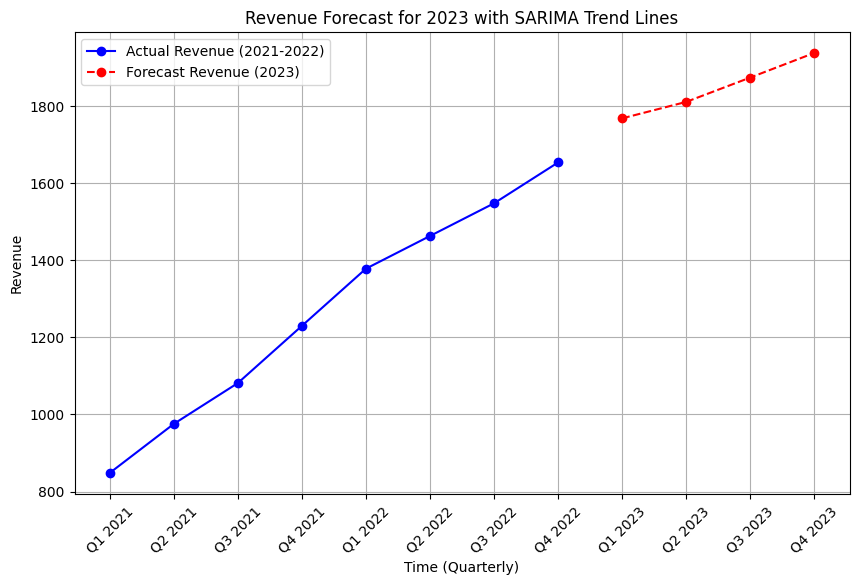

In [ ]:
# Plot the actual and forecasted values
plt.figure(figsize=(10, 6))
x_actual = np.arange(len(actual_revenue))  # X-axis for actual values (2022-2023)
plt.plot(x_actual, actual_revenue, label='Actual Revenue (2021-2022)', color='blue', linestyle='-', marker='o')

# X-axis for forecasted values (2024)
x_forecast = np.arange(len(actual_revenue), len(combined_revenue))  # Continue from the end of actual values
plt.plot(x_forecast, forecast, label='Forecast Revenue (2023)', color='red', linestyle='--', marker='o')

# Customize the plot
plt.xticks(ticks=np.arange(len(time_labels)), labels=time_labels, rotation=45)
plt.title('Revenue Forecast for 2023 with SARIMA Trend Lines')
plt.xlabel('Time (Quarterly)')
plt.ylabel('Revenue')
plt.legend()
plt.grid(True)

# Display the plot
plt.show()

In [ ]:
# prompt: print the forecast for all the bus_name in the dataframe format

import pandas as pd

# Assuming your forecast data is stored in a variable named 'forecast'
# and your DataFrame with bus_names is named 'data'


# Create a DataFrame with the bus_names and corresponding forecasts
forecast_df = pd.DataFrame({'bus_name': data['BUS_NAME'].unique(),
                            '2023Q1_forecast': forecast[0],
                            '2023Q2_forecast': forecast[1],
                            '2023Q3_forecast': forecast[2],
                            '2023Q4_forecast': forecast[3]})

# Print the DataFrame
print(forecast_df)

In [ ]:
# Compare the actual revenue and 2023 forecasted revenue and print the difference, kindly include the bus_name, 2023 revenue, forecast and difference

# Assuming your data is in a DataFrame called 'data'
data = pd.read_csv('/content/telecom_survey_data_quarterly_2021_23.csv')

# Calculate the actual 2023 revenue for each bus_name
revenue_columns_2023 = ['Q1_REV_AMT_2023', 'Q2_REV_AMT_2023', 'Q3_REV_AMT_2023', 'Q4_REV_AMT_2023']
data['2023_revenue'] = data[revenue_columns_2023].sum(axis=1)


In [ ]:
# Create a DataFrame with the bus_names and corresponding forecasts
# Assuming your 'forecast' variable contains the forecasted revenue for each quarter of 2023
forecast_df = pd.DataFrame({'bus_name': data['BUS_NAME'].unique(),
                            '2023Q1_forecast': forecast[0],
                            '2023Q2_forecast': forecast[1],
                            '2023Q3_forecast': forecast[2],
                            '2023Q4_forecast': forecast[3]})

# Calculate the total 2023 forecasted revenue
forecast_df['2023_forecast'] = forecast_df[['2023Q1_forecast', '2023Q2_forecast', '2023Q3_forecast', '2023Q4_forecast']].sum(axis=1)

# Merge the actual revenue and forecast data based on bus_name
comparison_df = pd.merge(data[['BUS_NAME', '2023_revenue']], forecast_df[['bus_name', '2023_forecast']], left_on='BUS_NAME', right_on='bus_name')

# Calculate the difference between actual and forecasted revenue
comparison_df['difference'] = comparison_df['2023_revenue'] - comparison_df['2023_forecast']

# Print the comparison DataFrame
print(comparison_df[['BUS_NAME', '2023_revenue', '2023_forecast', 'difference']])

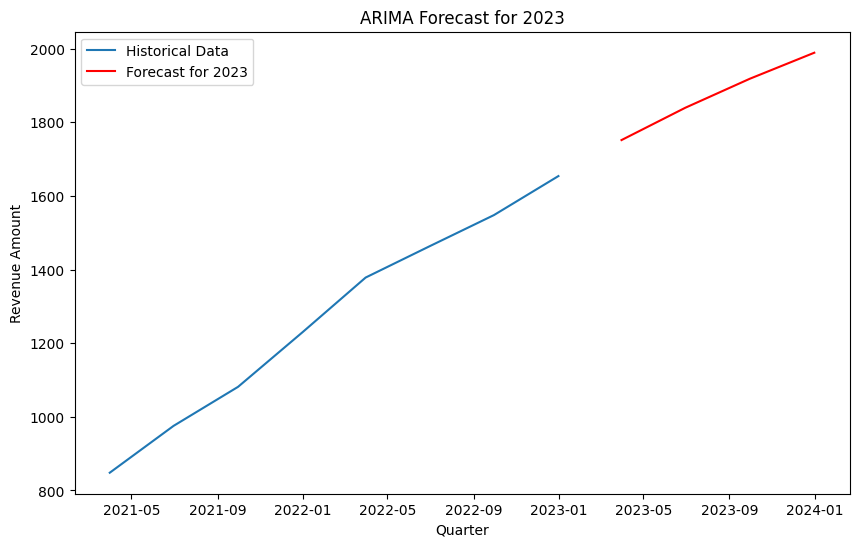

Forecast for 2023Q1: 1751.7953654799646
Forecast for 2023Q2: 1839.558851367942
Forecast for 2023Q3: 1918.3367404328133
Forecast for 2023Q4: 1989.0490160759955


<ipython-input-95-e5466bc9a32e>:43: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print(f"Forecast for 2023Q{i+1}: {forecast[i]}")


In [ ]:
# ARIMA Model - Forecast
#Import Key Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error

# Assuming your data is in a DataFrame called 'data'
data = pd.read_csv('/content/telecom_survey_data_quarterly_2021_23.csv')

# Create a time series of quarterly revenue data for 2021 & 2022
revenue_columns = ['Q1_REV_AMT_2021', 'Q2_REV_AMT_2021', 'Q3_REV_AMT_2021', 'Q4_REV_AMT_2021',
                   'Q1_REV_AMT_2022', 'Q2_REV_AMT_2022', 'Q3_REV_AMT_2022', 'Q4_REV_AMT_2022']
revenue_data = data[revenue_columns].mean(axis=0)

# Convert to time series with quarterly index
revenue_data.index = pd.date_range(start='2021Q1', periods=len(revenue_data), freq='Q')


# ARIMA Model Training
p = 1  # Autoregressive term
d = 1  # Differencing
q = 1  # Moving Average term
model = ARIMA(revenue_data, order=(p, d, q))
arima_result = model.fit()

# Forecasting for 2023 (next 4 quarters)
forecast_steps = 4
forecast = arima_result.forecast(steps=forecast_steps)
forecast_index = pd.date_range(start='2023Q1', periods=forecast_steps, freq='Q')

# Plotting the forecast
plt.figure(figsize=(10, 6))
plt.plot(revenue_data, label='Historical Data')
plt.plot(forecast_index, forecast, label='Forecast for 2023', color='red')
plt.title('ARIMA Forecast for 2023')
plt.xlabel('Quarter')
plt.ylabel('Revenue Amount')
plt.legend()
plt.show()

# Print the forecast for each quarter of 2023
for i in range(4):
  print(f"Forecast for 2023Q{i+1}: {forecast[i]}")


In [ ]:
# prompt: print the bus_name only for the positive difference along with the revenue, forecast and difference in the data frame format

# Assuming comparison_df is the DataFrame with 'BUS_NAME', '2023_revenue', '2023_forecast', and 'difference' columns

positive_difference_df = comparison_df[comparison_df['difference'] > 0][['BUS_NAME', '2023_revenue', '2023_forecast', 'difference']]
print(positive_difference_df)


                                     BUS_NAME  2023_revenue  2023_forecast  \
5                  Courtyard Denver Stapleton         17309    7498.739973   
10    RG Bank, A Savings and Loan Association         18079    7498.739973   
11                 Rocky Vista University LLC         22420    7498.739973   
19         Andy & Camille Nack Holding Co Inc          8082    7498.739973   
22                            Novel Coworking         11602    7498.739973   
...                                       ...           ...            ...   
4623                Advanced Gastroenterology         20644    7498.739973   
4624               Colorado Golf & Turf, Inc.          8122    7498.739973   
4627               Foothills Community Church         12653    7498.739973   
4629                 Primesource Staffing LLC         32277    7498.739973   
4632   Baycare Integrated Service Center, LLC         62765    7498.739973   

        difference  
5      9810.260027  
10    10580.260027  


Sales Volume Forest for 2024 using Quarterly Data

In [ ]:
# Step 1: Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [ ]:
# Load the data
data = pd.read_csv('/content/business_profile_telecom_salesvolume_quarterly_data.csv')
print(data.columns)

Index(['BUSINESS_NAME', 'STREET_ADDR', 'STREET_ADDR_2', 'CITY', 'STATE_CD',
       'COUNTRY_NAME', 'EMPLOYEES_HERE', 'EMPLOYEES_TOTAL', 'YEAR_ESTABLISHED',
       'LINE_OF_BUSINESS', 'SALES_VOLUME_USD_2023', 'SALES_VOLUME_USD_2023_Q1',
       'SALES_VOLUME_USD_2023_Q2', 'SALES_VOLUME_USD_2023_Q3',
       'SALES_VOLUME_USD_2023_Q4', 'SALES_VOLUME_USD_2022',
       'SALES_VOLUME_USD_2022_Q1', 'SALES_VOLUME_USD_2022_Q2',
       'SALES_VOLUME_USD_2022_Q3', 'SALES_VOLUME_USD_2022_Q4',
       'SALES_VOLUME_USD_2021', 'SALES_VOLUME_USD_2021_Q1',
       'SALES_VOLUME_USD_2021_Q2', 'SALES_VOLUME_USD_2021_Q3',
       'SALES_VOLUME_USD_2021_Q4', 'EF_ANL_ITBGT', 'EFF_TOT_CMMNCTN_BLL',
       'EF_CORP_DAT_NET_BILL', 'FIBER_INDR', 'FIBER_DIST_FT',
       'HSI_CAPABLE_INDR', 'CS_HSI_MAX_QUAL', 'CS_HSI_MAX_UP_QUAL',
       'CS_HSI_PROVISIONAL_QUAL', 'DSL_SPEED_UPGRADE_DATE',
       'VOIP_CAPABLE_INDR', 'SPEED_ETHCU_MAX', 'DPV_CONFIRM',
       'AVG_3_MO_TOT_REV_AMT', 'EST_NETWORK_SPEND_2023',
       'E

In [ ]:
# Step 2: Prepare data
# Use quarterly revenues from 2022 and 2023 to forecast 2024
features_lr = ['SALES_VOLUME_USD_2022_Q1', 'SALES_VOLUME_USD_2022_Q2', 'SALES_VOLUME_USD_2022_Q3', 'SALES_VOLUME_USD_2022_Q4',
               'SALES_VOLUME_USD_2023_Q1','SALES_VOLUME_USD_2023_Q2','SALES_VOLUME_USD_2023_Q3','SALES_VOLUME_USD_2023_Q4']
features_data = data[features_lr].mean(axis=0)

In [ ]:
print(features_data)

SALES_VOLUME_USD_2022_Q1    5.676547e+06
SALES_VOLUME_USD_2022_Q2    7.884093e+06
SALES_VOLUME_USD_2022_Q3    1.166846e+07
SALES_VOLUME_USD_2022_Q4    1.450673e+07
SALES_VOLUME_USD_2023_Q1    6.378143e+06
SALES_VOLUME_USD_2023_Q2    8.858531e+06
SALES_VOLUME_USD_2023_Q3    1.311063e+07
SALES_VOLUME_USD_2023_Q4    1.629970e+07
dtype: float64


In [ ]:
# Step 3: Import necessary libraries for building model & evaluation
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_percentage_error
from sklearn.linear_model import LinearRegression

In [ ]:
# Step 4: Prepare data
# Assuming features_lr is already defined and contains the appropriate columns
X = data[features_lr]

# For simplicity, using 2023 as a proxy for the target (since 2024 data isn't available)
y_Q1 = data['SALES_VOLUME_USD_2023_Q1']
y_Q2 = data['SALES_VOLUME_USD_2023_Q2']
y_Q3 = data['SALES_VOLUME_USD_2023_Q3']
y_Q4 = data['SALES_VOLUME_USD_2023_Q4']

In [ ]:
# Step 5: Forecasting for all four quarters in 2024
# Initialize the Linear Regression model
model = LinearRegression()

In [ ]:
# Step 6: Train and Predict
# Forecast for Q1 2024
model.fit(X, y_Q1)  # Training on 2023 data to predict 2024 (assumed scenario)
y_pred_Q1 = model.predict(X)

# Forecast for Q2 2024
model.fit(X, y_Q2)
y_pred_Q2 = model.predict(X)

# Forecast for Q3 2024
model.fit(X, y_Q3)
y_pred_Q3 = model.predict(X)

# Forecast for Q4 2024
model.fit(X, y_Q4)
y_pred_Q4 = model.predict(X)

In [ ]:
# Step 7: Evaluation Function
def evaluate_model(y_true, y_pred, quarter):
    mse = mean_squared_error(y_true, y_pred)
    r2 = r2_score(y_true, y_pred)
    mape = mean_absolute_percentage_error(y_true, y_pred)

    print(f"Evaluation for {quarter}:")
    print(f"Mean Squared Error (MSE): {mse}")
    print(f"R-Squared (R²): {r2}")
    print(f"Mean Absolute Percentage Error (MAPE): {mape * 100}%")
    print('-' * 50)

In [ ]:
# Step 8: Evaluate for each quarter
evaluate_model(y_Q1, y_pred_Q1, 'Q1 2024')
evaluate_model(y_Q2, y_pred_Q2, 'Q2 2024')
evaluate_model(y_Q3, y_pred_Q3, 'Q3 2024')
evaluate_model(y_Q4, y_pred_Q4, 'Q4 2024')

Evaluation for Q1 2024:
Mean Squared Error (MSE): 1.6756844065921525e-16
R-Squared (R²): 1.0
Mean Absolute Percentage Error (MAPE): 2.9550150458972537e-12%
--------------------------------------------------
Evaluation for Q2 2024:
Mean Squared Error (MSE): 2.803968346408558e-15
R-Squared (R²): 1.0
Mean Absolute Percentage Error (MAPE): 4.235721828202606e-12%
--------------------------------------------------
Evaluation for Q3 2024:
Mean Squared Error (MSE): 3.2366588145322994e-16
R-Squared (R²): 1.0
Mean Absolute Percentage Error (MAPE): 7.036983878751325e-15%
--------------------------------------------------
Evaluation for Q4 2024:
Mean Squared Error (MSE): 9.209227691848421e-16
R-Squared (R²): 1.0
Mean Absolute Percentage Error (MAPE): 2.310745812020955e-12%
--------------------------------------------------


In [ ]:
# Step 9: Combine results into a dataframe for easy handling and visualization
forecast_df = pd.DataFrame({
    'Q1_2022': data['SALES_VOLUME_USD_2022_Q1'],
    'Q2_2022': data['SALES_VOLUME_USD_2022_Q2'],
    'Q3_2022': data['SALES_VOLUME_USD_2022_Q3'],
    'Q4_2022': data['SALES_VOLUME_USD_2022_Q4'],
    'Q1_2023': data['SALES_VOLUME_USD_2023_Q1'],
    'Q2_2023': data['SALES_VOLUME_USD_2023_Q2'],
    'Q3_2023': data['SALES_VOLUME_USD_2023_Q3'],
    'Q4_2023': data['SALES_VOLUME_USD_2023_Q4'],
    'Forecast_Q1_2024': y_pred_Q1,
    'Forecast_Q2_2024': y_pred_Q2,
    'Forecast_Q3_2024': y_pred_Q3,
    'Forecast_Q4_2024': y_pred_Q4
})

In [ ]:
# Visualization with Trend Lines

# Prepare time data points for the x-axis
quarters = ['Q1', 'Q2', 'Q3', 'Q4']
years = ['2022', '2023', '2024']

In [ ]:
# Create x-axis labels combining years and quarters
time_labels = [f"{q} {y}" for y in years for q in quarters]

# Flatten the data for plotting trend lines
actual_values_2022_2023 = forecast_df[['Q1_2022', 'Q2_2022', 'Q3_2022', 'Q4_2022',
                                       'Q1_2023', 'Q2_2023', 'Q3_2023', 'Q4_2023']].mean().values

forecast_values_2024 = forecast_df[['Forecast_Q1_2024', 'Forecast_Q2_2024', 'Forecast_Q3_2024', 'Forecast_Q4_2024']].mean().values

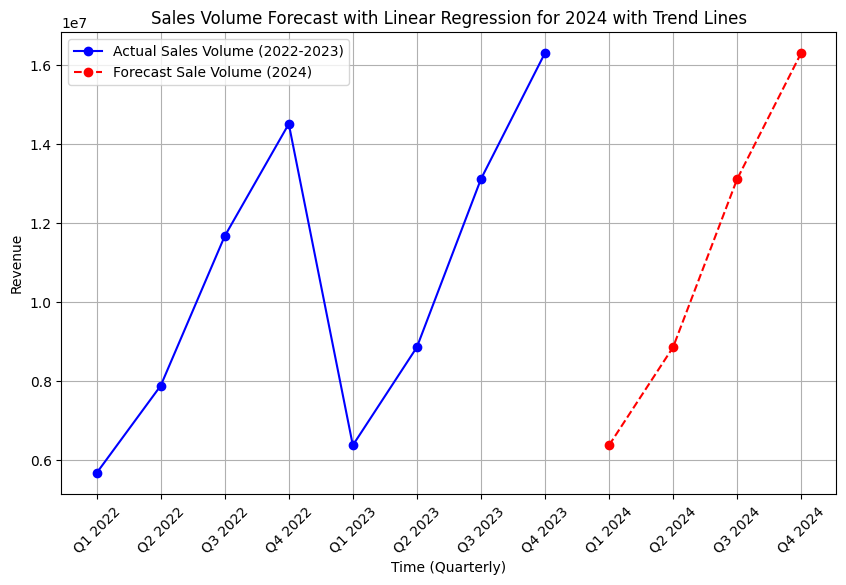

In [ ]:
# Plot the trend line for actual revenue (2022 and 2023)
#!pip install matplotlib
import matplotlib.pyplot as plt
import numpy as np #Added this line to import the numpy module and alias it as np

plt.figure(figsize=(10, 6))
x_actual = np.arange(1, 9)  # 8 points for 2022 and 2023
plt.plot(x_actual, actual_values_2022_2023, label='Actual Sales Volume (2022-2023)', color='blue', marker='o')

# Plot the trend line for forecasted sales volume growth (2024)
x_forecast = np.arange(9, 13)  # 4 points for 2024
plt.plot(x_forecast, forecast_values_2024, label='Forecast Sale Volume (2024)', color='red', marker='o', linestyle='--')

# Customize the plot
plt.xticks(ticks=np.arange(1, 13), labels=time_labels, rotation=45)
plt.title('Sales Volume Forecast with Linear Regression for 2024 with Trend Lines')
plt.xlabel('Time (Quarterly)')
plt.ylabel('Revenue')
plt.legend()
plt.grid(True)

# Display the plot
plt.show()